In [3]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Machine Learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from scipy.stats import randint as sp_randint
from sklearn.linear_model import SGDClassifier

# Multiprocesado
import multiprocessing

# Red Neuronal
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Guardar Modelo
import pickle

# ELIMINAR ACCELERÓMETRO

In [2]:
path = "data_train.csv"

df = pd.read_csv(path)

In [3]:
np.random.seed(33)

## Análisis exploratorio de los datos EDA

Para poder entender y comprender los datos con los que vamos a trabajar debemos saber:
- Cuántas instancias y atributos hay.
- Qué tipo de atributos hay.
- Si faltan atributos.

In [31]:
df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ,TimeStamp,label
0,16881.081225,5758.496506,5567.603447,14632.455355,10568.150533,9264.403383,13063.511123,8321.187513,120.643851,154.540706,158.180277,0.011955,0.013385,0.005531,45:34.524141,4
1,16927.246217,5782.102519,5545.079707,14595.045203,10517.216567,9330.444614,13067.267777,8310.394954,121.225928,154.980194,156.558566,0.028148,0.021393,0.020431,45:34.769324,4
2,17051.103268,5857.489256,5458.398303,14471.038654,10344.640265,9547.136552,13114.995698,8272.140879,120.210833,152.164541,160.696224,0.030210,0.049329,0.045778,45:35.021519,4
3,17210.788138,6080.085143,5198.136898,14187.870212,10051.852879,9809.431514,13345.911727,8452.234633,119.508385,151.527283,161.410636,0.092142,0.044935,0.053405,45:35.270292,4
4,17425.890595,6418.491243,4843.060889,13831.015447,9720.512823,10102.031784,13650.673624,9325.751100,119.391310,157.285552,156.091366,0.040415,0.013281,0.015688,45:35.524654,4


In [32]:
print(df.shape)

(1070, 16)


Obtenemos el número de gestos realizados, `label`

In [33]:
print("Gestos :", len(df["label"].unique()))
print()

Gestos : 7



0. Reposo
1. Puño
2. Palma
3. Flexión
4. Extensión
5. Pronación
6. Supinación



Observamos que tipos de datos tenemos en cada columna de la base de datos

In [34]:
df.dtypes

CH1          float64
CH2          float64
CH3          float64
CH4          float64
CH5          float64
CH6          float64
CH7          float64
CH8          float64
AccX         float64
AccY         float64
AccZ         float64
GyX          float64
GyY          float64
GyZ          float64
TimeStamp     object
label          int64
dtype: object

Dividimos los datos en entrados y salidas, de la entrada eliminamos datos irrelevantes para el cálculo de la salida, en este caso el momento exacto, `TimeStamp`, en el que lo realiza y la propia salida, `label`.

In [4]:
X_df = df.drop(["label", "TimeStamp", "AccX", "AccY", "AccZ"], axis=1)
y_df = df["label"]

In [36]:
X_df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,GyX,GyY,GyZ
0,16881.081225,5758.496506,5567.603447,14632.455355,10568.150533,9264.403383,13063.511123,8321.187513,0.011955,0.013385,0.005531
1,16927.246217,5782.102519,5545.079707,14595.045203,10517.216567,9330.444614,13067.267777,8310.394954,0.028148,0.021393,0.020431
2,17051.103268,5857.489256,5458.398303,14471.038654,10344.640265,9547.136552,13114.995698,8272.140879,0.030210,0.049329,0.045778
3,17210.788138,6080.085143,5198.136898,14187.870212,10051.852879,9809.431514,13345.911727,8452.234633,0.092142,0.044935,0.053405
4,17425.890595,6418.491243,4843.060889,13831.015447,9720.512823,10102.031784,13650.673624,9325.751100,0.040415,0.013281,0.015688


In [37]:
y_df.head()

0    4
1    4
2    4
3    4
4    4
Name: label, dtype: int64

In [38]:
X_df.describe()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,GyX,GyY,GyZ
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,11094.104942,10900.379584,8006.664676,14589.914388,13224.284909,10269.465524,11859.250788,9447.178542,0.043423,0.015421,0.014608
std,8591.629234,4139.519670,6842.928547,5012.185949,8127.799611,2404.700068,4583.576574,16908.508801,0.101775,0.021124,0.016230
min,29.660622,2516.672068,139.751427,7299.961136,2298.784544,5501.020475,5324.578475,480.783204,0.002094,0.001135,0.001064
25%,3570.698025,8504.933170,851.737638,9202.790424,4393.853989,8714.695931,7095.902675,2671.903565,0.008489,0.004901,0.005267
50%,14316.422122,10057.113338,9282.764071,15825.674110,17143.082252,10352.465636,12309.729042,5680.123859,0.014341,0.007937,0.008703
75%,16927.640872,12282.041061,12490.804234,18106.643498,21132.989954,12477.761688,17372.493219,7208.198876,0.028138,0.017299,0.017210
max,89471.632677,23831.645247,24187.775744,25068.083853,27442.407256,14438.602934,17992.319469,156087.716611,0.972397,0.234728,0.124204


Observamos si las salidas estan balanceadas

In [39]:
y_df.value_counts()

label
2    154
3    153
5    153
1    153
6    153
4    152
0    152
Name: count, dtype: int64

Observamos si hay valores nulos

In [40]:
X_df.isnull().any()

CH1    False
CH2    False
CH3    False
CH4    False
CH5    False
CH6    False
CH7    False
CH8    False
GyX    False
GyY    False
GyZ    False
dtype: bool

In [41]:
X_df.isnull().sum()

CH1    0
CH2    0
CH3    0
CH4    0
CH5    0
CH6    0
CH7    0
CH8    0
GyX    0
GyY    0
GyZ    0
dtype: int64

In [42]:
X_df.isnull().sum() / len(X_df) * 100

CH1    0.0
CH2    0.0
CH3    0.0
CH4    0.0
CH5    0.0
CH6    0.0
CH7    0.0
CH8    0.0
GyX    0.0
GyY    0.0
GyZ    0.0
dtype: float64

In [43]:
y_df.isnull().any()

False

In [44]:
y_df.isnull().sum()

0

In [45]:
y_df.isnull().sum() / len(y_df) * 100

0.0

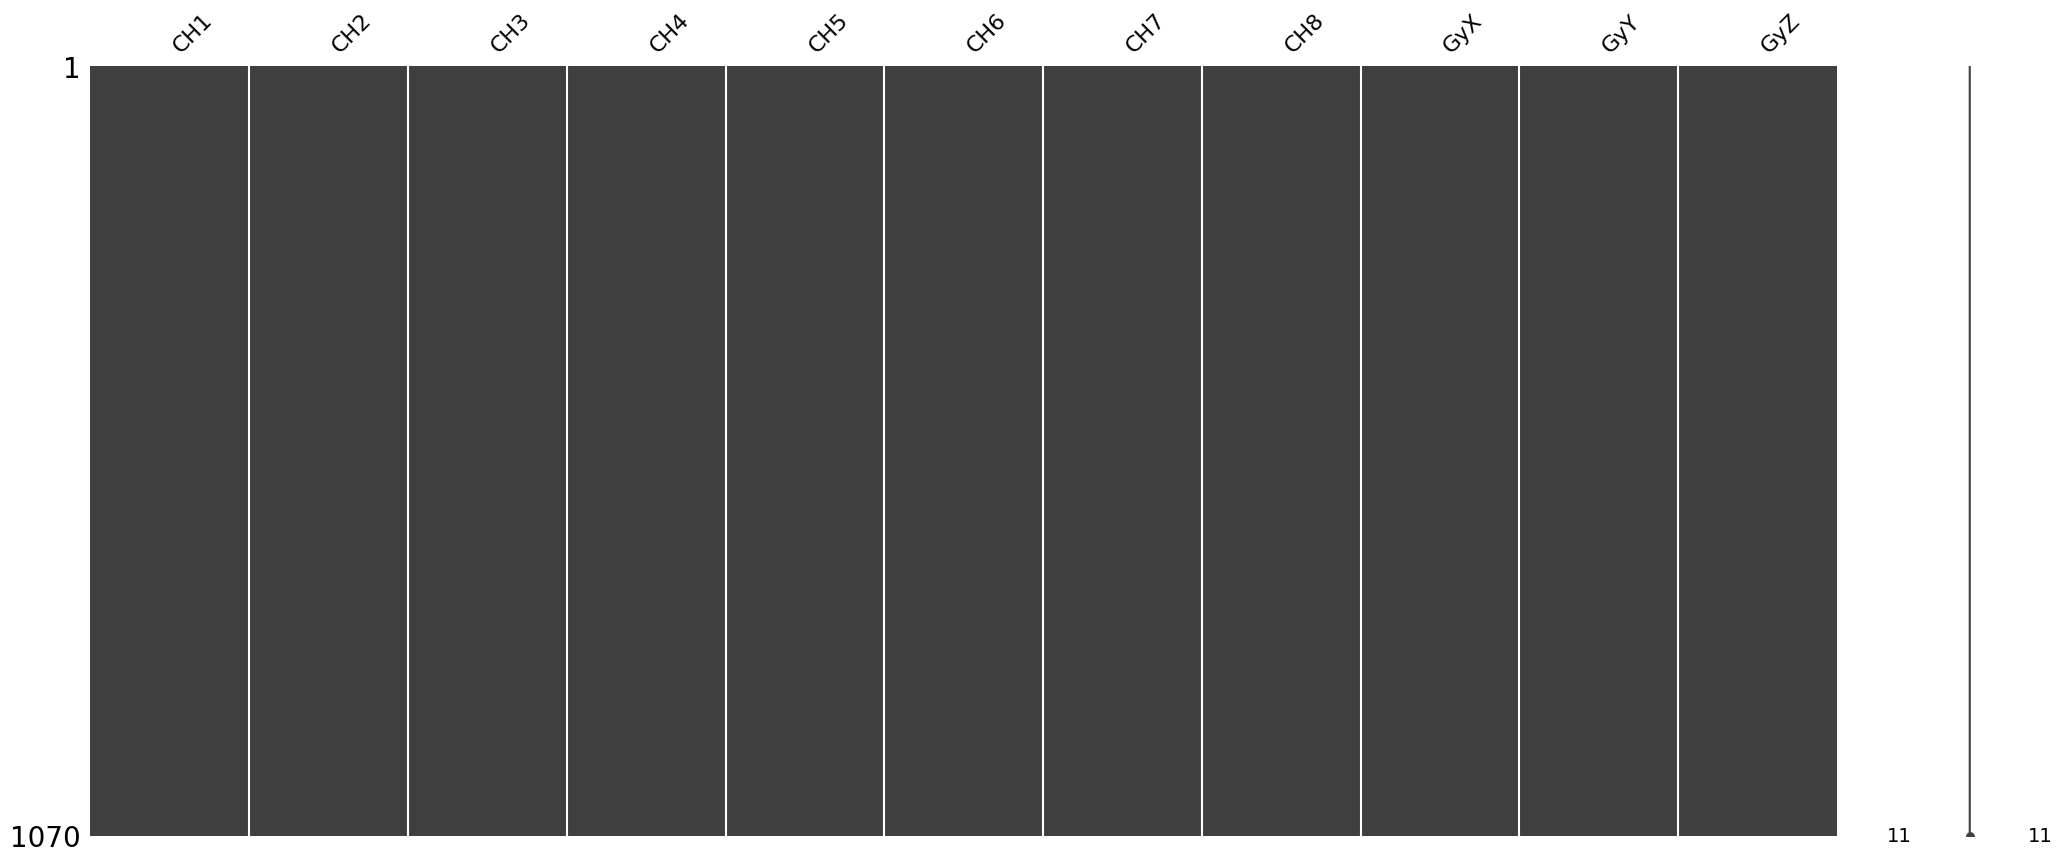

In [46]:
%config InlineBackend.figure_format = 'png'

msno.matrix(X_df)
plt.show()

Obtenemos la matriz de correlación entre las variables y la salida

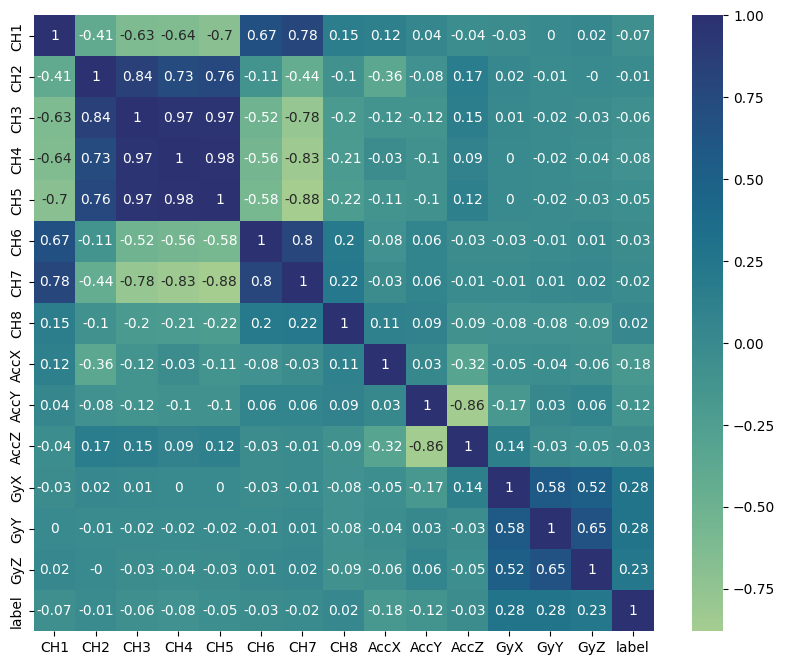

In [47]:
aux_df = df.drop(["TimeStamp"], axis=1)

plt.figure(figsize=(10, 8))

matriz_correlacion = aux_df.corr().round(2)
sns.heatmap(data=matriz_correlacion, annot=True, cmap="crest")

plt.show()

## PREPROCESADOR

Dividimos los datos en entrenamiento y test

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=False, test_size=0.3)

In [6]:
num_cols = x_train.select_dtypes(exclude="object").columns

1. Realizamos un `MinMaxScaler` para transformar los datos para que se encuentren dentro de un rango entre 0 y 1.
2. Realizamos un `RobustScaler` para escalar los datos de manera robusta frente a valores atípicos.

In [7]:
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols)
    ])

In [9]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                                 ('scaler2', RobustScaler())]),
                                 Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])

## RANDOM FOREST

In [53]:
random_forest_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight='balanced', random_state=33))])

In [54]:
random_forest_dist = {'classifier__n_estimators': [5, 10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 550],
                      'classifier__bootstrap': [True]}

random_forest_grid = GridSearchCV(random_forest_pipe,
                                   param_grid=random_forest_dist,
                                   n_jobs = multiprocessing.cpu_count() - 1,
                                   cv=3)

np.random.seed(33)

random_forest_grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=33))]),
             n_jobs=19,
             param_grid={'classifier__bootstrap': [True],
                         'classifier__n_estimators': [5, 10, 25, 50, 75, 100,
                                                      125, 150, 175, 200, 225,
                                                      250, 275, 300, 325, 350,
                                                      375, 400, 425, 450, 475,
                                                      500, 550]})

In [55]:
resultados = pd.DataFrame(random_forest_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__bootstrap,param_classifier__n_estimators,mean_test_score,std_test_score
0,True,5,0.355036,0.110991
18,True,425,0.337778,0.078447
17,True,400,0.336450,0.078386
16,True,375,0.336444,0.080047
6,True,125,0.335116,0.076767


In [56]:
random_forest_grid.best_score_

0.3550361445783133

In [57]:
random_forest_grid.best_params_

{'classifier__bootstrap': True, 'classifier__n_estimators': 5}

In [58]:
print(random_forest_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', n_estimators=5,
                                        random_state=33))])


In [59]:
modelo_final_forest = random_forest_grid.best_estimator_
y_test_pred = modelo_final_forest.predict(x_test)

In [60]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.22      0.34        46
           1       0.00      0.00      0.00        45
           2       0.19      0.07      0.10        46
           3       0.23      0.39      0.29        46
           4       0.35      0.40      0.37        47
           5       0.16      0.31      0.22        45
           6       0.28      0.37      0.32        46

    accuracy                           0.25       321
   macro avg       0.28      0.25      0.23       321
weighted avg       0.28      0.25      0.23       321



In [61]:
forest_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {forest_accuracy}")

El valor de accuracy: 0.2523364485981308


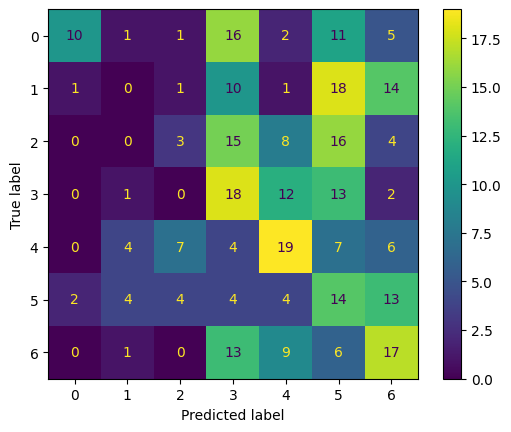

In [62]:
cm = confusion_matrix(y_test, y_test_pred, labels=random_forest_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_grid.classes_)
disp.plot()
plt.show()

## LOGISTIC REGRESSION

In [63]:
pipe_scale_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty=None, random_state = 33, class_weight='balanced'))])

In [64]:
logistic_dist = {
    'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150, 175, 200],
    'classifier__penalty': [None, 'l2'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}


logistic_grid = GridSearchCV(pipe_scale_lr,
                    param_grid = logistic_dist,
                    scoring='balanced_accuracy',
                    cv=3,
                    refit=True,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True,)

np.random.seed(33)

logistic_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           penalty=None,
                                                           random_state=33))]),
             n_jobs=-1,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__penalty': [None, 'l2'],
                         'classifier__solver': ['newton-cg', 'lbfgs', 'sag',
                                                'saga']},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [65]:
resultados = pd.DataFrame(logistic_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__penalty,param_classifier__solver,mean_test_score,std_test_score,mean_train_score,std_train_score
79,200,l2,saga,0.321504,0.033872,0.421657,0.03692
15,10,l2,saga,0.321504,0.033872,0.421657,0.03692
43,100,None,saga,0.321504,0.033872,0.421657,0.03692
51,125,None,saga,0.321504,0.033872,0.421657,0.03692
39,75,l2,saga,0.321504,0.033872,0.421657,0.03692


In [66]:
logistic_grid.best_params_

{'classifier__C': 1, 'classifier__penalty': None, 'classifier__solver': 'saga'}

In [67]:
logistic_grid.best_score_

0.32150415721844294

In [68]:
print(logistic_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', penalty=None,
                                    random_state=33, solver='saga'))])


In [69]:
modelo_final_logistic = logistic_grid.best_estimator_
print("Intercept:", modelo_final_logistic['classifier'].intercept_)
print("Coeficientes:", list(zip(df.columns, modelo_final_logistic['classifier'].coef_.flatten(), )))
print("Accuracy de test:", modelo_final_logistic.score(x_test, y_test))

Intercept: [ 0.29099766  0.46036385 -0.30612365  0.19382055 -0.507848    0.00790066
 -0.13911107]
Coeficientes: [('CH1', -0.10152609539473931), ('CH2', -0.13166559173242506), ('CH3', 0.18190789126811743), ('CH4', 0.23190588441203847), ('CH5', 0.04571618571413003), ('CH6', 0.45310358790448296), ('CH7', 0.2480038386366196), ('CH8', -0.27762922890536856), ('AccX', -1.661165083745758), ('AccY', -0.5367264266138644), ('AccZ', -0.1691624681468641), ('GyX', 1.1533756385689038), ('GyY', 0.042894953573013525), ('GyZ', 0.15574794867476452), ('TimeStamp', 0.18893002636130463), ('label', 0.048530371142507654)]
Accuracy de test: 0.2866043613707165


In [70]:
y_test_pred = modelo_final_logistic.predict(x_test)

In [71]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.32      0.83      0.46        46
           1       0.20      0.02      0.04        45
           2       0.13      0.04      0.07        46
           3       0.18      0.37      0.24        46
           4       1.00      0.15      0.26        47
           5       0.38      0.40      0.39        45
           6       0.28      0.20      0.23        46

    accuracy                           0.29       321
   macro avg       0.36      0.29      0.24       321
weighted avg       0.36      0.29      0.24       321



In [72]:
logistic_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {logistic_accuracy}")

El valor de accuracy: 0.2866043613707165


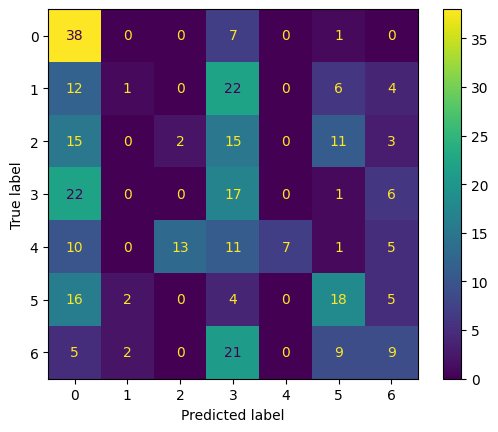

In [73]:
cm = confusion_matrix(y_test, y_test_pred, labels=logistic_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_grid.classes_)
disp.plot()
plt.show()

## BOOSTING


### HistGradientBoost

In [74]:
hist_gradient_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', HistGradientBoostingClassifier(random_state=33, 
                                                                    max_iter=1000,
                                                                    validation_fraction=0.1,
                                                                    n_iter_no_change=5,
                                                                    tol=0.0001))
                    ])

In [75]:
hist_gradient_dist = {'classifier__max_depth' : [None, 1, 3, 5, 7, 10, 25, 50, 75, 100],
              'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9],
              'classifier__l2_regularization' : [0, 1],
              'classifier__max_leaf_nodes': [5, 10, 25, 50, 75, 100]
             }

hist_gradient_grid = GridSearchCV(hist_gradient_pipe,
                           param_grid = hist_gradient_dist,
                           scoring='balanced_accuracy',
                           cv=3,
                           refit=True,
                           n_jobs=-1,
                           verbose=1,
                           return_train_score=True)

np.random.seed(33)

hist_gradient_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 840 candidates, totalling 2520 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        HistGradientBoostingClassifier(max_iter=1000,
                                                                       n_iter_no_change=5,
                                                                       random_state=33,
                                                                       tol=0.0001))]),
             n_jobs=-1,
             param_grid={'classifier__l2_regularization': [0, 1],
                         'classifier__learning_rate': [0.001, 0.01, 0.1, 0.3,
                                                       0.5, 0.7, 0.9],
                         'classifier__max_depth': [None, 1, 3, 5, 7, 10, 25, 50,
                                                   75, 100],
                         'classifier__max_leaf_nodes': [5, 10, 25, 50, 75,
                                                        100]},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [76]:
resultados = pd.DataFrame(hist_gradient_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__l2_regularization,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__max_leaf_nodes,mean_test_score,std_test_score,mean_train_score,std_train_score
503,1,0.01,5,100,0.354271,0.036295,1.0,0.0
502,1,0.01,5,75,0.354271,0.036295,1.0,0.0
501,1,0.01,5,50,0.354271,0.036295,1.0,0.0
500,1,0.01,5,25,0.354271,0.036295,1.0,0.0
219,0,0.3,25,50,0.354044,0.077888,1.0,0.0


In [77]:
hist_gradient_grid.best_params_

{'classifier__l2_regularization': 1,
 'classifier__learning_rate': 0.01,
 'classifier__max_depth': 5,
 'classifier__max_leaf_nodes': 25}

In [78]:
hist_gradient_grid.best_score_

0.35427059712774

In [79]:
print(hist_gradient_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                ('classifier',
                 HistGradientBoostingClassifier(l2_regularization=1,
                                                learning_rate=0.01, max_depth=5,
                                                max_iter=1000,
                                                max_leaf_nodes=25,
                                                n_iter_no_change=5,
                                     

In [80]:
modelo_final_hist = hist_gradient_grid.best_estimator_
y_test_pred = modelo_final_hist.predict(x_test)

In [81]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33        46
           1       0.17      0.22      0.19        45
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00        46
           4       1.00      0.21      0.35        47
           5       0.33      0.02      0.04        45
           6       0.16      0.67      0.26        46

    accuracy                           0.19       321
   macro avg       0.38      0.19      0.17       321
weighted avg       0.38      0.19      0.17       321



In [82]:
hist_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {hist_accuracy}")

El valor de accuracy: 0.19003115264797507


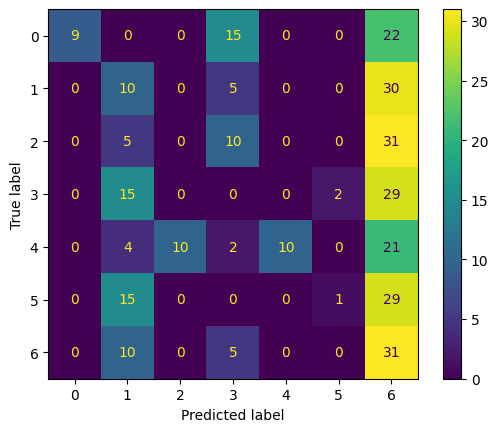

In [83]:
cm = confusion_matrix(y_test, y_test_pred, labels=hist_gradient_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=hist_gradient_grid.classes_)
disp.plot()
plt.show()

### XGBOOST

In [84]:
boost_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier(random_state=33))])

In [85]:
XGBoost_dist = {'classifier__max_depth'      : [3, 5, 7, 9, 11, 13, 15, 25, 50, 75, 100],
              'classifier__subsample'        : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__learning_rate'    : [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__n_estimators'     : sp_randint(10, 500).rvs(5)
              }

XGBoost_grid = GridSearchCV(boost_pipe,
    param_grid= XGBoost_dist,
    scoring    = 'balanced_accuracy',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = 3,
    refit      = True,
    verbose    = 0
)

np.random.seed(33)

XGBoost_grid.fit(X = x_train, y = y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_byle...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=33, ...))]),
             n_jobs=19,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7,
                                                       0.9, 1],
                         'classifier__max_depth': [3, 5, 7, 9, 11, 13, 15, 25,
                                                   50, 75, 100],
                         'classifier__n_estimators': array([ 30, 401, 226,  76, 156], dtype=int64),
                         'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1]},
             scoring='balanced_accuracy')

In [86]:
resultados = pd.DataFrame(XGBoost_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__subsample,mean_test_score,std_test_score
1987,1,3,401,0.3,0.354611,0.078781
1981,1,3,30,0.3,0.349017,0.075880
763,0.3,9,226,0.3,0.348753,0.072517
664,0.3,3,30,0.9,0.347808,0.053323
1993,1,3,226,0.3,0.347770,0.085568


In [87]:
XGBoost_grid.best_params_

{'classifier__learning_rate': 1,
 'classifier__max_depth': 3,
 'classifier__n_estimators': 401,
 'classifier__subsample': 0.3}

In [88]:
XGBoost_grid.best_score_

0.35461073318216174

In [89]:
print(XGBoost_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=No...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=1,
                 

In [90]:
modelo_final_xgb = XGBoost_grid.best_estimator_
y_test_pred = modelo_final_xgb.predict(x_test)

In [91]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.30      0.47        46
           1       0.34      0.24      0.29        45
           2       0.31      0.20      0.24        46
           3       0.15      0.13      0.14        46
           4       0.55      0.23      0.33        47
           5       0.52      0.24      0.33        45
           6       0.17      0.61      0.27        46

    accuracy                           0.28       321
   macro avg       0.43      0.28      0.29       321
weighted avg       0.44      0.28      0.29       321



In [92]:
xgb_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {xgb_accuracy}")

El valor de accuracy: 0.2803738317757009


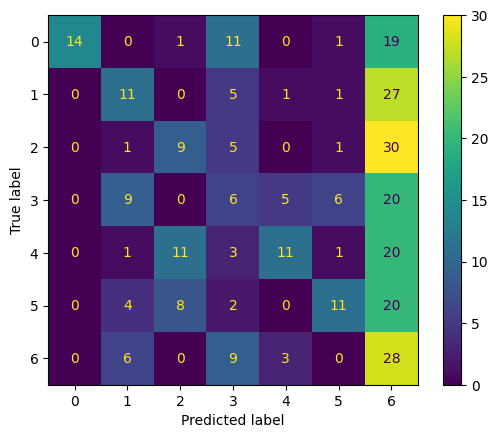

In [93]:
cm = confusion_matrix(y_test, y_test_pred, labels=XGBoost_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGBoost_grid.classes_)
disp.plot()
plt.show()

### LightGBM

In [94]:
light_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier(random_state=33))])

In [95]:
light_dist = {
    'classifier__max_depth': [3, 5, 7, 10, 25, 50, 100],
    'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
    'classifier__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'classifier__n_estimators': sp_randint(10, 500),
    'classifier__num_leaves': [3, 5, 7, 10, 25, 50, 100],
    'classifier__boosting_type': ['gbdt', 'rf'],
    'classifier__force_col_wise': [True],
}

light_grid = RandomizedSearchCV(light_pipe,
        param_distributions= light_dist,
        scoring    = 'balanced_accuracy',
        n_jobs     =  multiprocessing.cpu_count() - 1,
        cv         = 3, 
        refit      = True,
        verbose    = 1,
        return_train_score = True,
        n_iter= 500
       )

np.random.seed(33)
light_grid.fit(X = x_train, y = y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[LightGBM] [Info] Total Bins 2739
[LightGBM] [Info] Number of data points in the train set: 749, number of used features: 11
[LightGBM] [Info] Start training from score -1.955300
[LightGBM] [Info] Start training from score -1.936608
[LightGBM] [Info] Start training from score -1.936608
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.964779
[LightGBM] [Info] Start training from score -1.936608
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
723 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
723 fits failed with the following error:
Traceback (most recent call last):
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, 

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                MinMaxScaler()),
                                                                                               ('scaler2',
                                                                                                RobustScaler())]),
                                                                               Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                                             ('classifier',
                                              LGBMClassifier(random_state=33))]),
                   n_iter=500, n_jobs=19,
                   param_dist...
                                        'classifier__learning_rate': [0.1, 0.3,
                                                                      0.5, 0.7,
                                                                      0.9],
                                        'classifier__max_depth': [3, 5, 7, 10,
                                                                  25, 50, 100],
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002CDC23E5290>,
                                        'classifier__num_leaves': [3, 5, 7, 10,
                                                                   25, 50,
                                                                   100],
                                        'classifier__subsample': [0.1, 0.3, 0.5,
                                                                  0.7, 0.9,
                                                                  1]},
                   return_train_score=True, scoring='balanced_accuracy',
                   verbose=1)

In [96]:
resultados = pd.DataFrame(light_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__boosting_type,param_classifier__force_col_wise,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__num_leaves,param_classifier__subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
246,gbdt,True,0.9,7,70,25,1,0.361036,0.058746,1.0,0.0
77,gbdt,True,0.9,7,272,25,0.1,0.354384,0.059220,1.0,0.0
181,gbdt,True,0.9,7,408,25,0.9,0.354384,0.059220,1.0,0.0
159,gbdt,True,0.9,7,202,100,0.9,0.354384,0.059220,1.0,0.0
223,gbdt,True,0.9,100,18,10,0.1,0.354308,0.079922,1.0,0.0


In [97]:
light_grid.best_params_

{'classifier__boosting_type': 'gbdt',
 'classifier__force_col_wise': True,
 'classifier__learning_rate': 0.9,
 'classifier__max_depth': 7,
 'classifier__n_estimators': 70,
 'classifier__num_leaves': 25,
 'classifier__subsample': 1}

In [98]:
light_grid.best_score_

0.3610355253212396

In [99]:
print(light_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(force_col_wise=True, learning_rate=0.9,
                                max_depth=7, n_estimators=70, num_leaves=25,
                                random_state=33, subsample=1))])


In [100]:
modelo_final_light = light_grid.best_estimator_
y_test_pred = modelo_final_light.predict(x_test)

In [101]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.22      0.36        46
           1       0.08      0.04      0.06        45
           2       0.00      0.00      0.00        46
           3       0.08      0.17      0.11        46
           4       0.15      0.34      0.21        47
           5       0.16      0.16      0.16        45
           6       0.21      0.11      0.14        46

    accuracy                           0.15       321
   macro avg       0.24      0.15      0.15       321
weighted avg       0.24      0.15      0.15       321



In [102]:
light_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {light_accuracy}")

El valor de accuracy: 0.14953271028037382


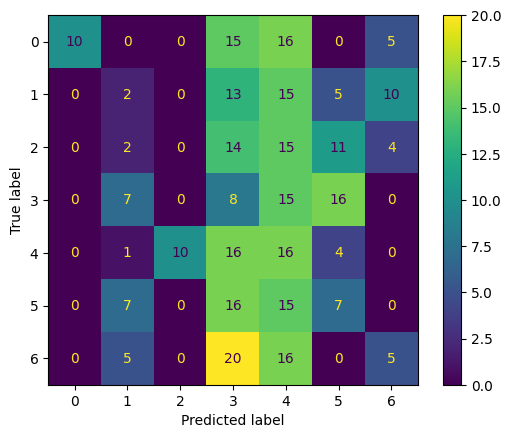

In [103]:
cm = confusion_matrix(y_test, y_test_pred, labels=light_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=light_grid.classes_)
disp.plot()
plt.show()

## SVM

In [104]:
svm_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

In [105]:
svm_param_dist = {
    'classifier__C': [ 1, 10, 25, 50, 75, 100, 125, 150, 175, 200],  
    'classifier__kernel': ['linear', 'rbf'], 
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 5, 10]
}

svm_grid = GridSearchCV(
    svm_pipe,
    param_grid=svm_param_dist,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

svm_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                                       ('classifier', SVC())]),
             n_jobs=19,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__gamma': ['scale', 'auto', 0.001, 0.01,
                                               0.1, 1, 5, 10],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='balanced_accuracy')

In [106]:
resultados = pd.DataFrame(svm_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__gamma,param_classifier__kernel,mean_test_score,std_test_score
71,75,0.01,rbf,0.356387,0.036174
17,10,scale,rbf,0.352268,0.036262
33,25,scale,rbf,0.351020,0.038196
49,50,scale,rbf,0.346485,0.014418
55,50,0.01,rbf,0.345616,0.036295


In [107]:
svm_grid.best_params_

{'classifier__C': 75, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}

In [108]:
svm_grid.best_score_

0.35638699924414213

In [109]:
print(svm_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                ('classifier', SVC(C=75, gamma=0.01))])


In [110]:
modelo_final_svm = svm_grid.best_estimator_

In [111]:
y_test_pred = modelo_final_svm.predict(x_test)

In [112]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.49      0.61      0.54        46
           1       0.00      0.00      0.00        45
           2       0.00      0.00      0.00        46
           3       0.20      0.43      0.28        46
           4       0.28      0.21      0.24        47
           5       0.28      0.56      0.38        45
           6       0.33      0.20      0.25        46

    accuracy                           0.29       321
   macro avg       0.23      0.29      0.24       321
weighted avg       0.23      0.29      0.24       321



d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
svm_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {svm_accuracy}")

El valor de accuracy: 0.2866043613707165


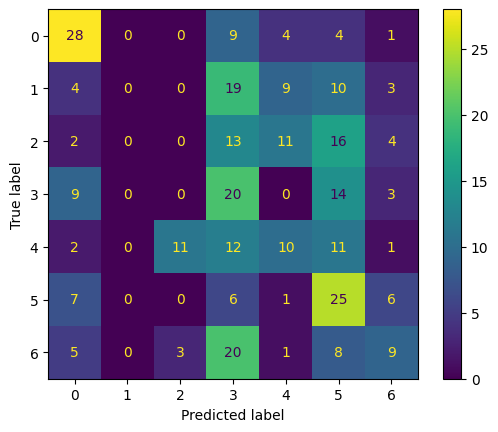

In [114]:
cm = confusion_matrix(y_test, y_test_pred, labels=svm_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_grid.classes_)
disp.plot()
plt.show()

## SGD


In [115]:
sgd_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SGDClassifier())])

In [116]:
sgd_params = {
    'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 0.00001],   
    'classifier__penalty': ['l1', 'l2', 'elasticnet', None],        
    'classifier__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'], 
    'classifier__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
      'classifier__eta0': [0.001, 0.01, 0.1]  
}

sgd_grid = GridSearchCV(sgd_pipe,
    param_grid=sgd_params,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

sgd_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                                       ('classifier', SGDClassifier())]),
             n_jobs=19,
             param_grid={'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'classifier__eta0': [0.001, 0.01, 0.1],
                         'classifier__learning_rate': ['constant', 'optimal',
                                                       'invscaling',
                                                       'adaptive'],
                         'classifier__loss': ['hinge', 'log_loss',
                                              'modified_huber', 'squared_hinge',
                                              'perceptron'],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 None]},
             scoring='balanced_accuracy')

In [117]:
resultados = pd.DataFrame(sgd_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__alpha,param_classifier__eta0,param_classifier__learning_rate,param_classifier__loss,param_classifier__penalty,mean_test_score,std_test_score
424,0.01,0.1,optimal,log_loss,l1,0.353515,0.050521
344,0.01,0.01,optimal,log_loss,l1,0.346523,0.012247
464,0.01,0.1,adaptive,log_loss,l1,0.341194,0.018381
1083,0.00001,0.01,invscaling,hinge,None,0.338889,0.004562
264,0.01,0.001,optimal,log_loss,l1,0.335639,0.036696


In [118]:
sgd_grid.best_params_

{'classifier__alpha': 0.01,
 'classifier__eta0': 0.1,
 'classifier__learning_rate': 'optimal',
 'classifier__loss': 'log_loss',
 'classifier__penalty': 'l1'}

In [119]:
sgd_grid.best_score_

0.35351473922902493

In [120]:
print(sgd_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                ('classifier',
                 SGDClassifier(alpha=0.01, eta0=0.1, loss='log_loss',
                               penalty='l1'))])


In [121]:
modelo_final_sgd = sgd_grid.best_estimator_
y_test_pred = modelo_final_sgd.predict(x_test)

In [122]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.56      0.65      0.60        46
           1       0.26      0.18      0.21        45
           2       0.00      0.00      0.00        46
           3       0.17      0.54      0.26        46
           4       1.00      0.28      0.43        47
           5       0.36      0.47      0.40        45
           6       0.47      0.15      0.23        46

    accuracy                           0.32       321
   macro avg       0.40      0.32      0.31       321
weighted avg       0.40      0.32      0.31       321



In [123]:
sgd_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {sgd_accuracy}")

El valor de accuracy: 0.32398753894080995


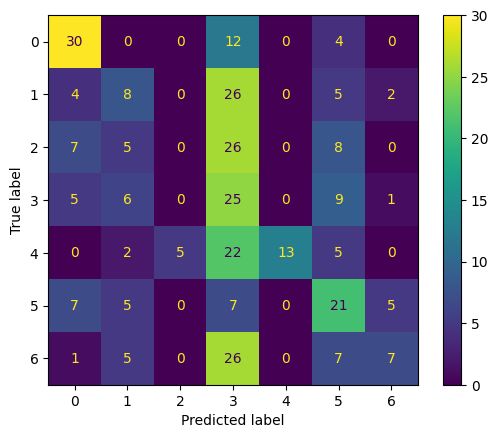

In [124]:
cm = confusion_matrix(y_test, y_test_pred, labels=sgd_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_grid.classes_)
disp.plot()
plt.show()

## ELECCION DEL MEJOR MODELO

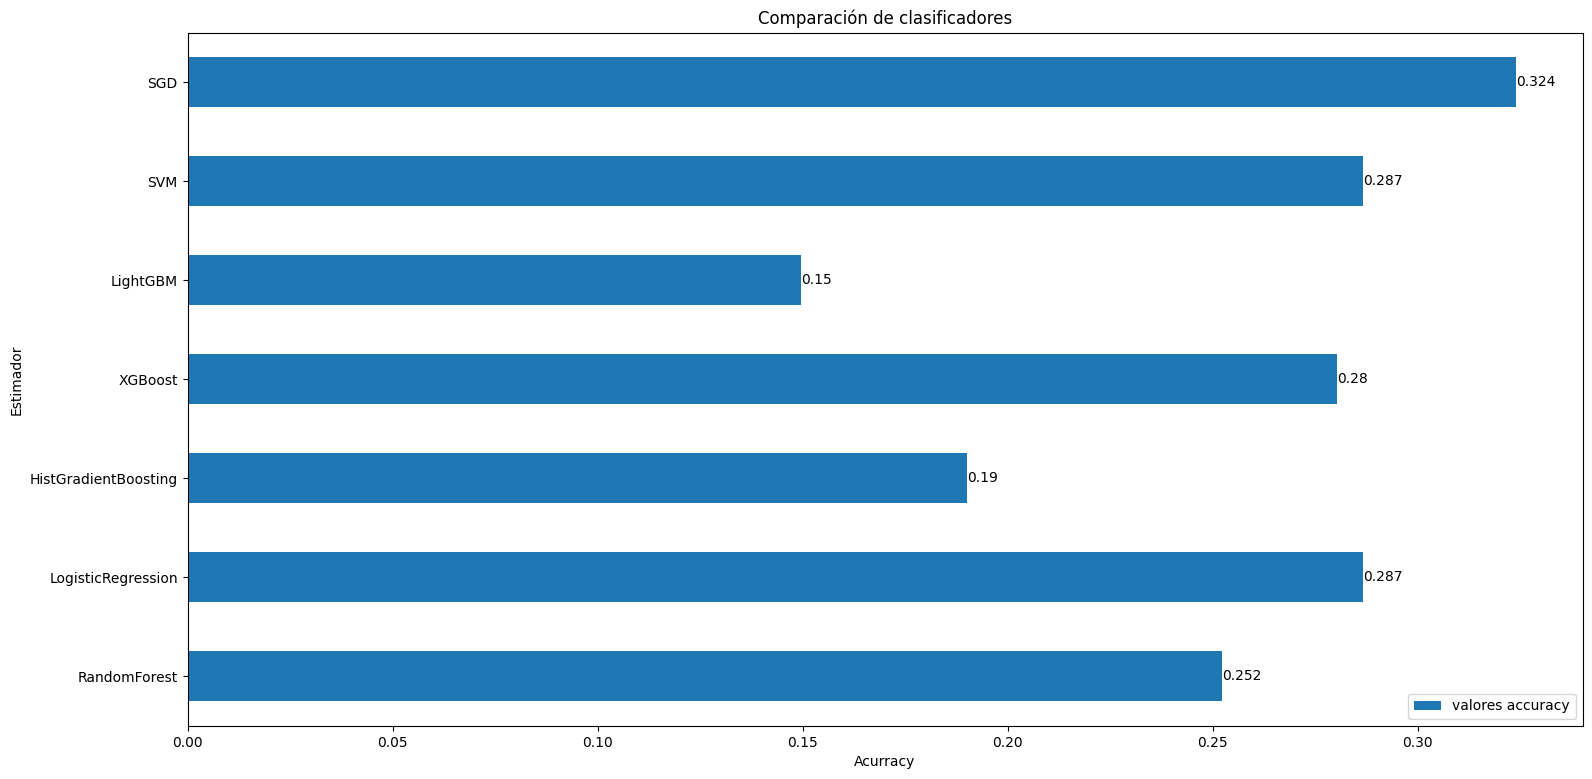

In [125]:
df_comparacion = pd.DataFrame({
                    'estimador': ['RandomForest', 'LogisticRegression', 'HistGradientBoosting', 'XGBoost', 'LightGBM', 'SVM', 'SGD'],
                    'valores accuracy': [forest_accuracy, logistic_accuracy, hist_accuracy, xgb_accuracy, light_accuracy, svm_accuracy, sgd_accuracy]
                 })

fig, ax = plt.subplots(figsize=(18, 9))
df_comparacion.set_index('estimador').plot(kind='barh', ax=ax)
ax.set_xlabel('Acurracy')
ax.set_ylabel('Estimador')
ax.set_title('Comparación de clasificadores');

for i, v in enumerate(df_comparacion['valores accuracy']):
    ax.annotate(str(round(v, 3)), xy=(v, i), va='center', ha='left', fontsize=10)

Ahora diseñamos todos los mejores modelos para probar su capacidad de generalización, con otros datos en el archivo `generalizacion.ipynb`.

In [126]:
preprocessor = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [16]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(
        alpha = 0.01,
        eta0 = 0.1,
        learning_rate = 'optimal',
        loss = 'log_loss',
        penalty = 'l1'   
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/NO AC/modelo_SGD.pkl', 'wb'))

In [10]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        bootstrap = True,
        n_estimators = 5
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/NO AC/modelo_RF.pkl', 'wb'))

In [15]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        C = 75,
        gamma = 0.01,
        kernel = 'rbf'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/NO AC/modelo_SVM.pkl', 'wb'))

In [11]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        C = 1,
        penalty = None,
        solver = 'saga',
        class_weight='balanced'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/NO AC/modelo_LR.pkl', 'wb'))

d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [12]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier(
        validation_fraction = 0.1,
        n_iter_no_change = 5,
        tol = 0.0001,
        l2_regularization = 1,
        learning_rate = 0.01,
        max_depth = 5,
        max_leaf_nodes = 25         
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/NO AC/modelo_HIST.pkl', 'wb'))

In [13]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        learning_rate = 1,
        max_depth = 3,
        n_estimators = 401,
        subsample = 0.3        
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/NO AC/modelo_XGB.pkl', 'wb'))

In [14]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(
        boosting_type = 'gbdt',
        force_col_wise = True,
        learning_rate = 0.9,
        max_depth = 7,
        n_estimators = 70,
        num_leaves = 25,
        subsample = 1      
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/NO AC/modelo_LGBMC.pkl', 'wb'))

[LightGBM] [Info] Total Bins 2739
[LightGBM] [Info] Number of data points in the train set: 749, number of used features: 11
[LightGBM] [Info] Start training from score -1.955300
[LightGBM] [Info] Start training from score -1.936608
[LightGBM] [Info] Start training from score -1.936608
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.964779
[LightGBM] [Info] Start training from score -1.936608
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

# ELIMINAR IMU

In [17]:
path = "data_train.csv"

df = pd.read_csv(path)

In [18]:
np.random.seed(33)

## Análisis exploratorio de los datos EDA

Para poder entender y comprender los datos con los que vamos a trabajar debemos saber:
- Cuántas instancias y atributos hay.
- Qué tipo de atributos hay.
- Si faltan atributos.

In [136]:
df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ,TimeStamp,label
0,16881.081225,5758.496506,5567.603447,14632.455355,10568.150533,9264.403383,13063.511123,8321.187513,120.643851,154.540706,158.180277,0.011955,0.013385,0.005531,45:34.524141,4
1,16927.246217,5782.102519,5545.079707,14595.045203,10517.216567,9330.444614,13067.267777,8310.394954,121.225928,154.980194,156.558566,0.028148,0.021393,0.020431,45:34.769324,4
2,17051.103268,5857.489256,5458.398303,14471.038654,10344.640265,9547.136552,13114.995698,8272.140879,120.210833,152.164541,160.696224,0.030210,0.049329,0.045778,45:35.021519,4
3,17210.788138,6080.085143,5198.136898,14187.870212,10051.852879,9809.431514,13345.911727,8452.234633,119.508385,151.527283,161.410636,0.092142,0.044935,0.053405,45:35.270292,4
4,17425.890595,6418.491243,4843.060889,13831.015447,9720.512823,10102.031784,13650.673624,9325.751100,119.391310,157.285552,156.091366,0.040415,0.013281,0.015688,45:35.524654,4


In [137]:
print(df.shape)

(1070, 16)


Obtenemos el número de gestos realizados, `label`

In [138]:
print("Gestos :", len(df["label"].unique()))
print()

Gestos : 7



0. Reposo
1. Puño
2. Palma
3. Flexión
4. Extensión
5. Pronación
6. Supinación


Observamos que tipos de datos tenemos en cada columna de la base de datos

In [139]:
df.dtypes

CH1          float64
CH2          float64
CH3          float64
CH4          float64
CH5          float64
CH6          float64
CH7          float64
CH8          float64
AccX         float64
AccY         float64
AccZ         float64
GyX          float64
GyY          float64
GyZ          float64
TimeStamp     object
label          int64
dtype: object

Dividimos los datos en entrados y salidas, de la entrada eliminamos datos irrelevantes para el cálculo de la salida, en este caso el momento exacto, `TimeStamp`, en el que lo realiza y la propia salida, `label`.

In [19]:
X_df = df.drop(["label", "TimeStamp", "AccX", "AccY", "AccZ", "GyX", "GyY", "GyZ"], axis=1)
y_df = df["label"]

In [141]:
X_df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8
0,16881.081225,5758.496506,5567.603447,14632.455355,10568.150533,9264.403383,13063.511123,8321.187513
1,16927.246217,5782.102519,5545.079707,14595.045203,10517.216567,9330.444614,13067.267777,8310.394954
2,17051.103268,5857.489256,5458.398303,14471.038654,10344.640265,9547.136552,13114.995698,8272.140879
3,17210.788138,6080.085143,5198.136898,14187.870212,10051.852879,9809.431514,13345.911727,8452.234633
4,17425.890595,6418.491243,4843.060889,13831.015447,9720.512823,10102.031784,13650.673624,9325.751100


In [142]:
y_df.head()

0    4
1    4
2    4
3    4
4    4
Name: label, dtype: int64

In [143]:
X_df.describe()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,11094.104942,10900.379584,8006.664676,14589.914388,13224.284909,10269.465524,11859.250788,9447.178542
std,8591.629234,4139.519670,6842.928547,5012.185949,8127.799611,2404.700068,4583.576574,16908.508801
min,29.660622,2516.672068,139.751427,7299.961136,2298.784544,5501.020475,5324.578475,480.783204
25%,3570.698025,8504.933170,851.737638,9202.790424,4393.853989,8714.695931,7095.902675,2671.903565
50%,14316.422122,10057.113338,9282.764071,15825.674110,17143.082252,10352.465636,12309.729042,5680.123859
75%,16927.640872,12282.041061,12490.804234,18106.643498,21132.989954,12477.761688,17372.493219,7208.198876
max,89471.632677,23831.645247,24187.775744,25068.083853,27442.407256,14438.602934,17992.319469,156087.716611


Observamos si las salidas estan balanceadas

In [144]:
y_df.value_counts()

label
2    154
3    153
5    153
1    153
6    153
4    152
0    152
Name: count, dtype: int64

Observamos si hay valores nulos

In [145]:
X_df.isnull().any()

CH1    False
CH2    False
CH3    False
CH4    False
CH5    False
CH6    False
CH7    False
CH8    False
dtype: bool

In [146]:
X_df.isnull().sum()

CH1    0
CH2    0
CH3    0
CH4    0
CH5    0
CH6    0
CH7    0
CH8    0
dtype: int64

In [147]:
X_df.isnull().sum() / len(X_df) * 100

CH1    0.0
CH2    0.0
CH3    0.0
CH4    0.0
CH5    0.0
CH6    0.0
CH7    0.0
CH8    0.0
dtype: float64

In [148]:
y_df.isnull().any()

False

In [149]:
y_df.isnull().sum()

0

In [150]:
y_df.isnull().sum() / len(y_df) * 100

0.0

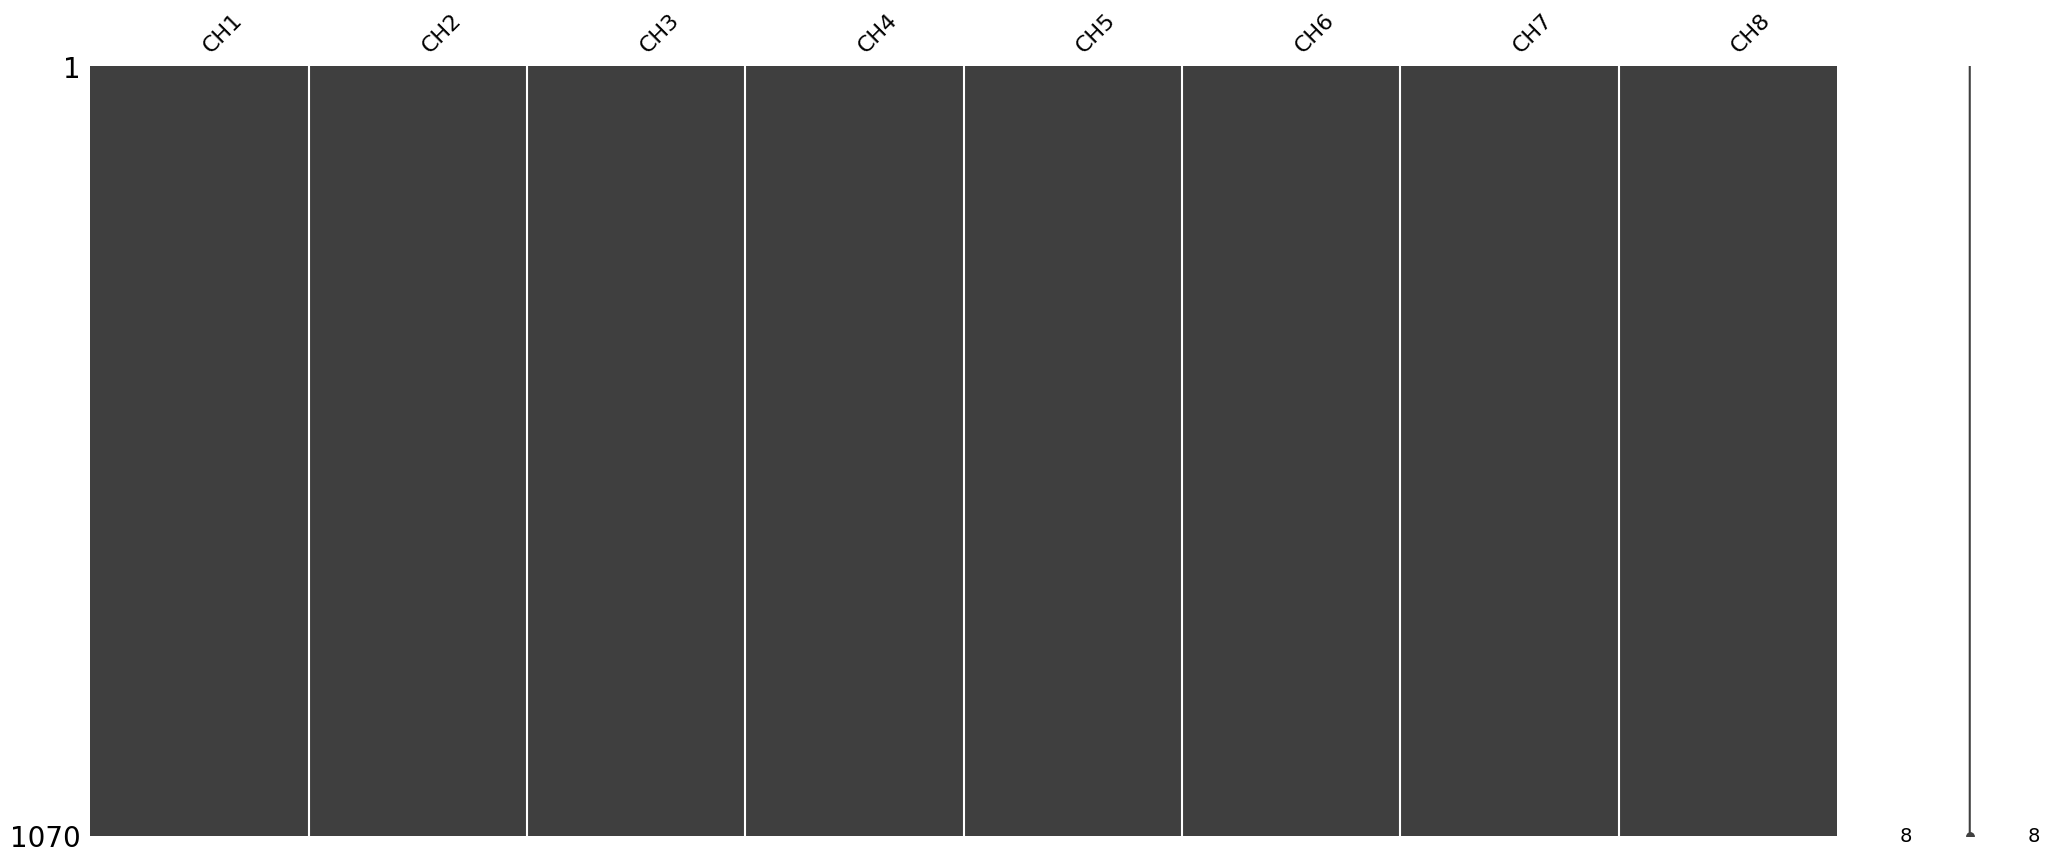

In [151]:
%config InlineBackend.figure_format = 'png'

msno.matrix(X_df)
plt.show()

Obtenemos la matriz de correlación entre las variables y la salida

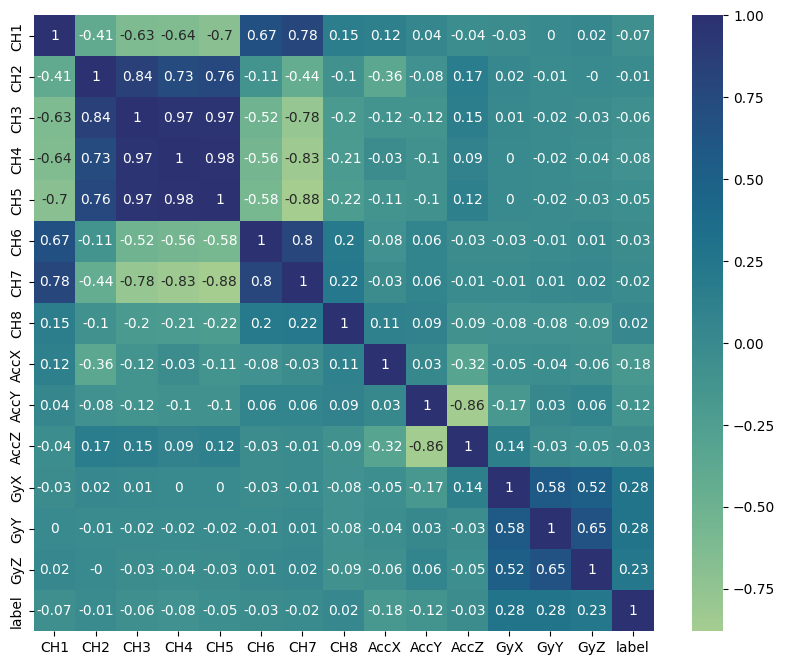

In [152]:
aux_df = df.drop(["TimeStamp"], axis=1)

plt.figure(figsize=(10, 8))

matriz_correlacion = aux_df.corr().round(2)
sns.heatmap(data=matriz_correlacion, annot=True, cmap="crest")

plt.show()

## PREPROCESADOR

Dividimos los datos en entrenamiento y test

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=False, test_size=0.3)

In [21]:
num_cols = x_train.select_dtypes(exclude="object").columns

1. Realizamos un `MinMaxScaler` para transformar los datos para que se encuentren dentro de un rango entre 0 y 1.
2. Realizamos un `RobustScaler` para escalar los datos de manera robusta frente a valores atípicos.

In [22]:
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols)
    ])

In [24]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                                 ('scaler2', RobustScaler())]),
                                 Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])

## RANDOM FOREST

In [158]:
random_forest_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight='balanced', random_state=33))])

In [159]:
random_forest_dist = {'classifier__n_estimators': [5, 10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 550],
                      'classifier__bootstrap': [True]}

random_forest_grid = GridSearchCV(random_forest_pipe,
                                   param_grid=random_forest_dist,
                                   n_jobs = multiprocessing.cpu_count() - 1,
                                   cv=3)

np.random.seed(33)

random_forest_grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=33))]),
             n_jobs=19,
             param_grid={'classifier__bootstrap': [True],
                         'classifier__n_estimators': [5, 10, 25, 50, 75, 100,
                                                      125, 150, 175, 200, 225,
                                                      250, 275, 300, 325, 350,
                                                      375, 400, 425, 450, 475,
                                                      500, 550]})

In [160]:
resultados = pd.DataFrame(random_forest_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__bootstrap,param_classifier__n_estimators,mean_test_score,std_test_score
0,True,5,0.348412,0.127161
1,True,10,0.339074,0.148906
17,True,400,0.332391,0.092439
18,True,425,0.327058,0.097697
16,True,375,0.325719,0.091893


In [161]:
random_forest_grid.best_score_

0.34841231593038824

In [162]:
random_forest_grid.best_params_

{'classifier__bootstrap': True, 'classifier__n_estimators': 5}

In [163]:
print(random_forest_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', n_estimators=5,
                                        random_state=33))])


In [164]:
modelo_final_forest = random_forest_grid.best_estimator_
y_test_pred = modelo_final_forest.predict(x_test)

In [165]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.08      0.18      0.11        45
           2       0.20      0.57      0.30        46
           3       0.00      0.00      0.00        46
           4       1.00      0.21      0.35        47
           5       0.00      0.00      0.00        45
           6       0.26      0.35      0.30        46

    accuracy                           0.19       321
   macro avg       0.22      0.19      0.15       321
weighted avg       0.22      0.19      0.15       321



d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [166]:
forest_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {forest_accuracy}")

El valor de accuracy: 0.18691588785046728


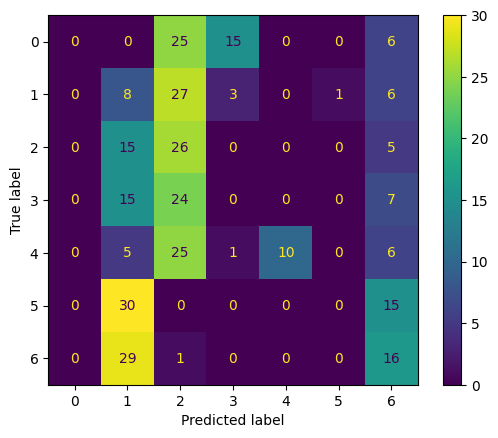

In [167]:
cm = confusion_matrix(y_test, y_test_pred, labels=random_forest_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_grid.classes_)
disp.plot()
plt.show()

## LOGISTIC REGRESSION

In [168]:
pipe_scale_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty=None, random_state = 33, class_weight='balanced'))])

In [169]:
logistic_dist = {
    'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150, 175, 200],
    'classifier__penalty': [None, 'l2'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}


logistic_grid = GridSearchCV(pipe_scale_lr,
                    param_grid = logistic_dist,
                    scoring='balanced_accuracy',
                    cv=3,
                    refit=True,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True,)

np.random.seed(33)

logistic_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           penalty=None,
                                                           random_state=33))]),
             n_jobs=-1,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__penalty': [None, 'l2'],
                         'classifier__solver': ['newton-cg', 'lbfgs', 'sag',
                                                'saga']},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [170]:
resultados = pd.DataFrame(logistic_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__penalty,param_classifier__solver,mean_test_score,std_test_score,mean_train_score,std_train_score
30,50,l2,sag,0.209221,0.018796,0.330095,0.036069
70,175,l2,sag,0.209221,0.018796,0.331417,0.036094
46,100,l2,sag,0.209221,0.018796,0.331417,0.036094
54,125,l2,sag,0.209221,0.018796,0.331417,0.036094
38,75,l2,sag,0.209221,0.018796,0.330756,0.036888


In [171]:
logistic_grid.best_params_

{'classifier__C': 50, 'classifier__penalty': 'l2', 'classifier__solver': 'sag'}

In [172]:
logistic_grid.best_score_

0.2092214663643235

In [173]:
print(logistic_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=50, class_weight='balanced',
                                    random_state=33, solver='sag'))])


In [174]:
modelo_final_logistic = logistic_grid.best_estimator_
print("Intercept:", modelo_final_logistic['classifier'].intercept_)
print("Coeficientes:", list(zip(df.columns, modelo_final_logistic['classifier'].coef_.flatten(), )))
print("Accuracy de test:", modelo_final_logistic.score(x_test, y_test))

Intercept: [ 0.55512496  0.49805192 -0.86811111  0.30485552 -1.12598424  0.34425352
  0.29180942]
Coeficientes: [('CH1', -0.7863862269691303), ('CH2', -1.2401261729570958), ('CH3', 1.1593684006507607), ('CH4', 0.6663007692307212), ('CH5', 0.08087476825289207), ('CH6', 2.221662792496388), ('CH7', 0.02311298011569235), ('CH8', -0.5071970866814232), ('AccX', 2.195806650342729), ('AccY', 0.6947560997685777), ('AccZ', -0.2788514636823183), ('GyX', 0.6828577466366815), ('GyY', -0.8972733707704372), ('GyZ', -1.6626236817606144), ('TimeStamp', -0.2991827502960154), ('label', -0.16934081194714679)]
Accuracy de test: 0.21806853582554517


In [175]:
y_test_pred = modelo_final_logistic.predict(x_test)

In [176]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.14      0.67      0.24        46
           1       1.00      0.02      0.04        45
           2       0.00      0.00      0.00        46
           3       0.23      0.33      0.27        46
           4       1.00      0.19      0.32        47
           5       0.70      0.31      0.43        45
           6       0.00      0.00      0.00        46

    accuracy                           0.22       321
   macro avg       0.44      0.22      0.19       321
weighted avg       0.44      0.22      0.19       321



In [177]:
logistic_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {logistic_accuracy}")

El valor de accuracy: 0.21806853582554517


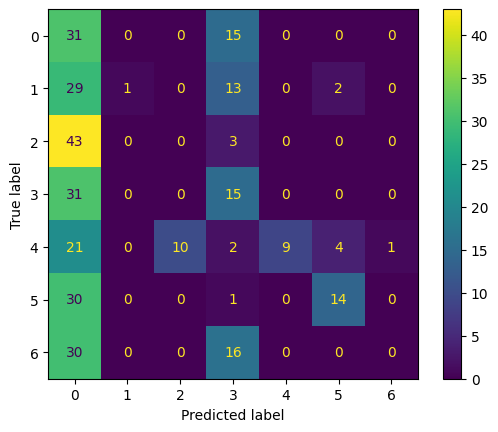

In [178]:
cm = confusion_matrix(y_test, y_test_pred, labels=logistic_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_grid.classes_)
disp.plot()
plt.show()

## BOOSTING


### HistGradientBoost

In [179]:
hist_gradient_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', HistGradientBoostingClassifier(random_state=33, 
                                                                    max_iter=1000,
                                                                    validation_fraction=0.1,
                                                                    n_iter_no_change=5,
                                                                    tol=0.0001))
                    ])

In [180]:
hist_gradient_dist = {'classifier__max_depth' : [None, 1, 3, 5, 7, 10, 25, 50, 75, 100],
              'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9],
              'classifier__l2_regularization' : [0, 1],
              'classifier__max_leaf_nodes': [5, 10, 25, 50, 75, 100]
             }

hist_gradient_grid = GridSearchCV(hist_gradient_pipe,
                           param_grid = hist_gradient_dist,
                           scoring='balanced_accuracy',
                           cv=3,
                           refit=True,
                           n_jobs=-1,
                           verbose=1,
                           return_train_score=True)

np.random.seed(33)

hist_gradient_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 840 candidates, totalling 2520 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                                       ('classifier',
                                        HistGradientBoostingClassifier(max_iter=1000,
                                                                       n_iter_no_change=5,
                                                                       random_state=33,
                                                                       tol=0.0001))]),
             n_jobs=-1,
             param_grid={'classifier__l2_regularization': [0, 1],
                         'classifier__learning_rate': [0.001, 0.01, 0.1, 0.3,
                                                       0.5, 0.7, 0.9],
                         'classifier__max_depth': [None, 1, 3, 5, 7, 10, 25, 50,
                                                   75, 100],
                         'classifier__max_leaf_nodes': [5, 10, 25, 50, 75,
                                                        100]},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [181]:
resultados = pd.DataFrame(hist_gradient_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__l2_regularization,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__max_leaf_nodes,mean_test_score,std_test_score,mean_train_score,std_train_score
799,1,0.9,5,10,0.364210,0.078285,1.0,0.0
805,1,0.9,7,10,0.361187,0.068727,1.0,0.0
745,1,0.7,7,10,0.352986,0.073251,1.0,0.0
114,0,0.01,100,5,0.349471,0.046064,1.0,0.0
84,0,0.01,7,5,0.349471,0.046064,1.0,0.0


In [182]:
hist_gradient_grid.best_params_

{'classifier__l2_regularization': 1,
 'classifier__learning_rate': 0.9,
 'classifier__max_depth': 5,
 'classifier__max_leaf_nodes': 10}

In [183]:
hist_gradient_grid.best_score_

0.3642101284958428

In [184]:
print(hist_gradient_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                ('classifier',
                 HistGradientBoostingClassifier(l2_regularization=1,
                                                learning_rate=0.9, max_depth=5,
                                                max_iter=1000,
                                                max_leaf_nodes=10,
                                                n_iter_no_change=5,
                                                random_state=33, tol=0.0

In [185]:
modelo_final_hist = hist_gradient_grid.best_estimator_
y_test_pred = modelo_final_hist.predict(x_test)

In [186]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.18      0.16      0.17        45
           2       0.37      0.15      0.22        46
           3       0.00      0.00      0.00        46
           4       1.00      0.21      0.35        47
           5       0.00      0.00      0.00        45
           6       0.16      0.67      0.26        46

    accuracy                           0.17       321
   macro avg       0.24      0.17      0.14       321
weighted avg       0.25      0.17      0.14       321



d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [187]:
hist_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {hist_accuracy}")

El valor de accuracy: 0.17133956386292834


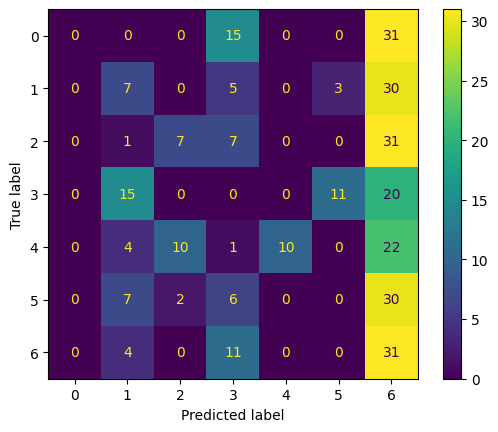

In [188]:
cm = confusion_matrix(y_test, y_test_pred, labels=hist_gradient_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=hist_gradient_grid.classes_)
disp.plot()
plt.show()

### XGBOOST

In [189]:
boost_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier(random_state=33))])

In [190]:
XGBoost_dist = {'classifier__max_depth'      : [3, 5, 7, 9, 11, 13, 15, 25, 50, 75, 100],
              'classifier__subsample'        : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__learning_rate'    : [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__n_estimators'     : sp_randint(10, 500).rvs(5)
              }

XGBoost_grid = GridSearchCV(boost_pipe,
    param_grid= XGBoost_dist,
    scoring    = 'balanced_accuracy',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = 3,
    refit      = True,
    verbose    = 0
)

np.random.seed(33)

XGBoost_grid.fit(X = x_train, y = y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=33, ...))]),
             n_jobs=19,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7,
                                                       0.9, 1],
                         'classifier__max_depth': [3, 5, 7, 9, 11, 13, 15, 25,
                                                   50, 75, 100],
                         'classifier__n_estimators': array([ 30, 401, 226,  76, 156], dtype=int64),
                         'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1]},
             scoring='balanced_accuracy')

In [191]:
resultados = pd.DataFrame(XGBoost_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__subsample,mean_test_score,std_test_score
1661,0.9,3,401,1,0.352683,0.105410
2009,1,3,156,1,0.348639,0.085579
1655,0.9,3,30,1,0.347581,0.088658
1667,0.9,3,226,1,0.347468,0.091940
1450,0.7,11,401,0.9,0.347392,0.068884


In [192]:
XGBoost_grid.best_params_

{'classifier__learning_rate': 0.9,
 'classifier__max_depth': 3,
 'classifier__n_estimators': 401,
 'classifier__subsample': 1}

In [193]:
XGBoost_grid.best_score_

0.35268329554043837

In [194]:
print(XGBoost_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytre...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.9,

In [195]:
modelo_final_xgb = XGBoost_grid.best_estimator_
y_test_pred = modelo_final_xgb.predict(x_test)

In [196]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.20      0.18      0.19        45
           2       0.33      0.28      0.30        46
           3       0.00      0.00      0.00        46
           4       1.00      0.21      0.35        47
           5       0.00      0.00      0.00        45
           6       0.16      0.67      0.26        46

    accuracy                           0.19       321
   macro avg       0.24      0.19      0.16       321
weighted avg       0.24      0.19      0.16       321



d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [197]:
xgb_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {xgb_accuracy}")

El valor de accuracy: 0.19314641744548286


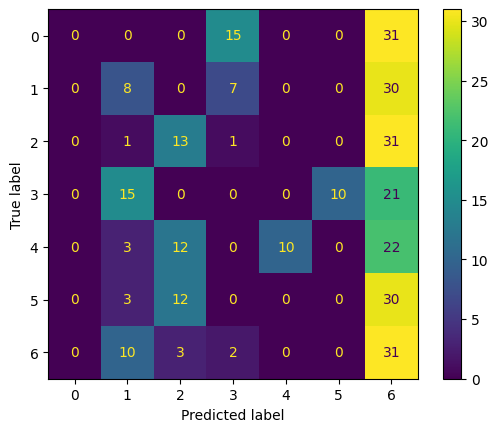

In [198]:
cm = confusion_matrix(y_test, y_test_pred, labels=XGBoost_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGBoost_grid.classes_)
disp.plot()
plt.show()

### LightGBM

In [199]:
light_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier(random_state=33))])

In [200]:
light_dist = {
    'classifier__max_depth': [3, 5, 7, 10, 25, 50, 100],
    'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
    'classifier__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'classifier__n_estimators': sp_randint(10, 500),
    'classifier__num_leaves': [3, 5, 7, 10, 25, 50, 100],
    'classifier__boosting_type': ['gbdt', 'rf'],
    'classifier__force_col_wise': [True],
}

light_grid = RandomizedSearchCV(light_pipe,
        param_distributions= light_dist,
        scoring    = 'balanced_accuracy',
        n_jobs     =  multiprocessing.cpu_count() - 1,
        cv         = 3, 
        refit      = True,
        verbose    = 1,
        return_train_score = True,
        n_iter= 500
       )

np.random.seed(33)
light_grid.fit(X = x_train, y = y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
[LightGBM] [Info] Total Bins 1992
[LightGBM] [Info] Number of data points in the train set: 749, number of used features: 8
[LightGBM] [Info] Start training from score -1.955300
[LightGBM] [Info] Start training from score -1.936608
[LightGBM] [Info] Start training from score -1.936608
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.964779
[LightGBM] [Info] Start training from score -1.936608
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
723 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
723 fits failed with the following error:
Traceback (most recent call last):
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, 

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                MinMaxScaler()),
                                                                                               ('scaler2',
                                                                                                RobustScaler())]),
                                                                               Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                                             ('classifier',
                                              LGBMClassifier(random_state=33))]),
                   n_iter=500, n_jobs=19,
                   param_distributions={'classi...
                                        'classifier__learning_rate': [0.1, 0.3,
                                                                      0.5, 0.7,
                                                                      0.9],
                                        'classifier__max_depth': [3, 5, 7, 10,
                                                                  25, 50, 100],
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002CDBEC0ACD0>,
                                        'classifier__num_leaves': [3, 5, 7, 10,
                                                                   25, 50,
                                                                   100],
                                        'classifier__subsample': [0.1, 0.3, 0.5,
                                                                  0.7, 0.9,
                                                                  1]},
                   return_train_score=True, scoring='balanced_accuracy',
                   verbose=1)

In [201]:
resultados = pd.DataFrame(light_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__boosting_type,param_classifier__force_col_wise,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__num_leaves,param_classifier__subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
50,gbdt,True,0.9,10,153,50,0.5,0.346334,0.086114,1.0,0.0
110,gbdt,True,0.3,50,28,100,0.3,0.336281,0.113614,1.0,0.0
179,gbdt,True,0.3,50,61,50,0.1,0.336243,0.101845,1.0,0.0
41,gbdt,True,0.5,25,19,100,0.9,0.335488,0.086484,1.0,0.0
232,gbdt,True,0.3,10,112,50,0.9,0.334845,0.128726,1.0,0.0


In [202]:
light_grid.best_params_

{'classifier__boosting_type': 'gbdt',
 'classifier__force_col_wise': True,
 'classifier__learning_rate': 0.9,
 'classifier__max_depth': 10,
 'classifier__n_estimators': 153,
 'classifier__num_leaves': 50,
 'classifier__subsample': 0.5}

In [203]:
light_grid.best_score_

0.3463340891912321

In [204]:
print(light_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                ('classifier',
                 LGBMClassifier(force_col_wise=True, learning_rate=0.9,
                                max_depth=10, n_estimators=153, num_leaves=50,
                                random_state=33, subsample=0.5))])


In [205]:
modelo_final_light = light_grid.best_estimator_
y_test_pred = modelo_final_light.predict(x_test)

In [206]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.07      0.02      0.03        45
           2       0.31      0.24      0.27        46
           3       0.02      0.04      0.03        46
           4       0.44      0.26      0.32        47
           5       0.00      0.00      0.00        45
           6       0.13      0.33      0.19        46

    accuracy                           0.13       321
   macro avg       0.14      0.13      0.12       321
weighted avg       0.14      0.13      0.12       321



In [207]:
light_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {light_accuracy}")

El valor de accuracy: 0.1277258566978193


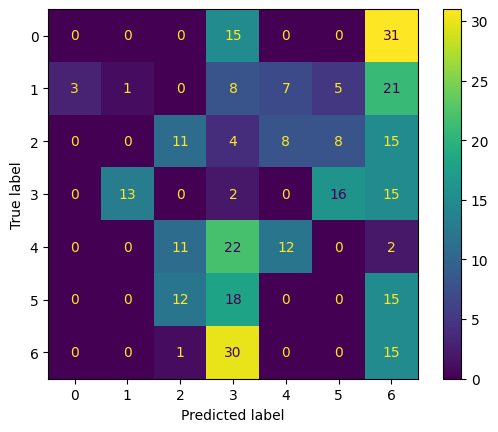

In [208]:
cm = confusion_matrix(y_test, y_test_pred, labels=light_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=light_grid.classes_)
disp.plot()
plt.show()

## SVM

In [209]:
svm_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

In [210]:
svm_param_dist = {
    'classifier__C': [ 1, 10, 25, 50, 75, 100, 125, 150, 175, 200],  
    'classifier__kernel': ['linear', 'rbf'], 
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 5, 10]
}

svm_grid = GridSearchCV(
    svm_pipe,
    param_grid=svm_param_dist,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

svm_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                                       ('classifier', SVC())]),
             n_jobs=19,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__gamma': ['scale', 'auto', 0.001, 0.01,
                                               0.1, 1, 5, 10],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='balanced_accuracy')

In [211]:
resultados = pd.DataFrame(svm_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__gamma,param_classifier__kernel,mean_test_score,std_test_score
61,50,5,rbf,0.327173,0.050071
63,50,10,rbf,0.326568,0.096730
111,125,10,rbf,0.325246,0.101618
143,175,10,rbf,0.323923,0.100037
127,150,10,rbf,0.323923,0.100037


In [212]:
svm_grid.best_params_

{'classifier__C': 50, 'classifier__gamma': 5, 'classifier__kernel': 'rbf'}

In [213]:
svm_grid.best_score_

0.32717309145880574

In [214]:
print(svm_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                ('classifier', SVC(C=50, gamma=5))])


In [215]:
modelo_final_svm = svm_grid.best_estimator_

In [216]:
y_test_pred = modelo_final_svm.predict(x_test)

In [217]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.00      0.00      0.00        45
           2       0.10      0.26      0.15        46
           3       0.00      0.00      0.00        46
           4       0.19      0.43      0.26        47
           5       0.00      0.00      0.00        45
           6       0.33      0.35      0.34        46

    accuracy                           0.15       321
   macro avg       0.09      0.15      0.11       321
weighted avg       0.09      0.15      0.11       321



d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [218]:
svm_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {svm_accuracy}")

El valor de accuracy: 0.14953271028037382


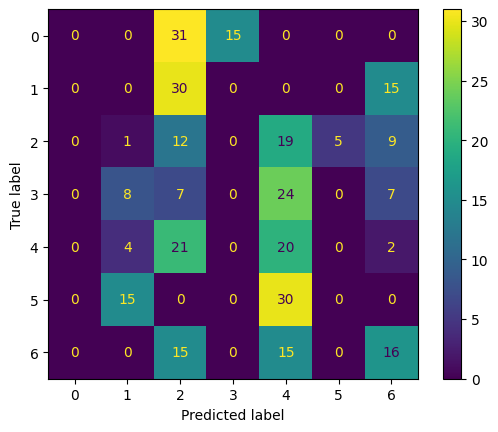

In [219]:
cm = confusion_matrix(y_test, y_test_pred, labels=svm_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_grid.classes_)
disp.plot()
plt.show()

## SGD


In [220]:
sgd_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SGDClassifier())])

In [221]:
sgd_params = {
    'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 0.00001],   
    'classifier__penalty': ['l1', 'l2', 'elasticnet', None],        
    'classifier__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'], 
    'classifier__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
      'classifier__eta0': [0.001, 0.01, 0.1]  
}

sgd_grid = GridSearchCV(sgd_pipe,
    param_grid=sgd_params,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

sgd_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                                       ('classifier', SGDClassifier())]),
             n_jobs=19,
             param_grid={'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'classifier__eta0': [0.001, 0.01, 0.1],
                         'classifier__learning_rate': ['constant', 'optimal',
                                                       'invscaling',
                                                       'adaptive'],
                         'classifier__loss': ['hinge', 'log_loss',
                                              'modified_huber', 'squared_hinge',
                                              'perceptron'],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 None]},
             scoring='balanced_accuracy')

In [222]:
resultados = pd.DataFrame(sgd_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__alpha,param_classifier__eta0,param_classifier__learning_rate,param_classifier__loss,param_classifier__penalty,mean_test_score,std_test_score
324,0.01,0.01,constant,log_loss,l1,0.250907,0.037700
204,0.1,0.1,invscaling,log_loss,l1,0.249735,0.041006
464,0.01,0.1,adaptive,log_loss,l1,0.246977,0.037070
1014,0.00001,0.001,invscaling,squared_hinge,elasticnet,0.244898,0.028895
30,0.1,0.001,optimal,modified_huber,elasticnet,0.244067,0.042273


In [223]:
sgd_grid.best_params_

{'classifier__alpha': 0.01,
 'classifier__eta0': 0.01,
 'classifier__learning_rate': 'constant',
 'classifier__loss': 'log_loss',
 'classifier__penalty': 'l1'}

In [224]:
sgd_grid.best_score_

0.25090702947845805

In [225]:
print(sgd_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                ('classifier',
                 SGDClassifier(alpha=0.01, eta0=0.01, learning_rate='constant',
                               loss='log_loss', penalty='l1'))])


In [226]:
modelo_final_sgd = sgd_grid.best_estimator_
y_test_pred = modelo_final_sgd.predict(x_test)

In [227]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.18      0.67      0.28        46
           1       0.50      0.36      0.42        45
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00        46
           4       1.00      0.19      0.32        47
           5       0.00      0.00      0.00        45
           6       0.15      0.17      0.16        46

    accuracy                           0.20       321
   macro avg       0.26      0.20      0.17       321
weighted avg       0.26      0.20      0.17       321



d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [228]:
sgd_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {sgd_accuracy}")

El valor de accuracy: 0.19937694704049844


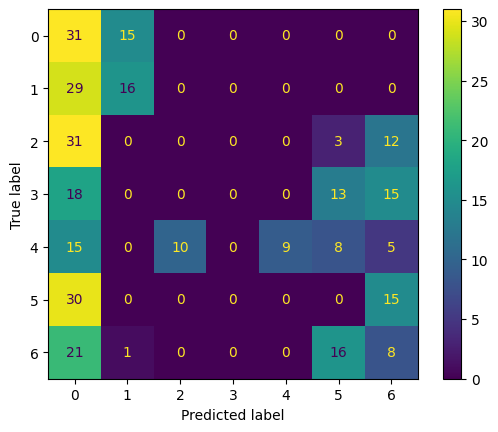

In [229]:
cm = confusion_matrix(y_test, y_test_pred, labels=sgd_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_grid.classes_)
disp.plot()
plt.show()

## ELECCION DEL MEJOR MODELO

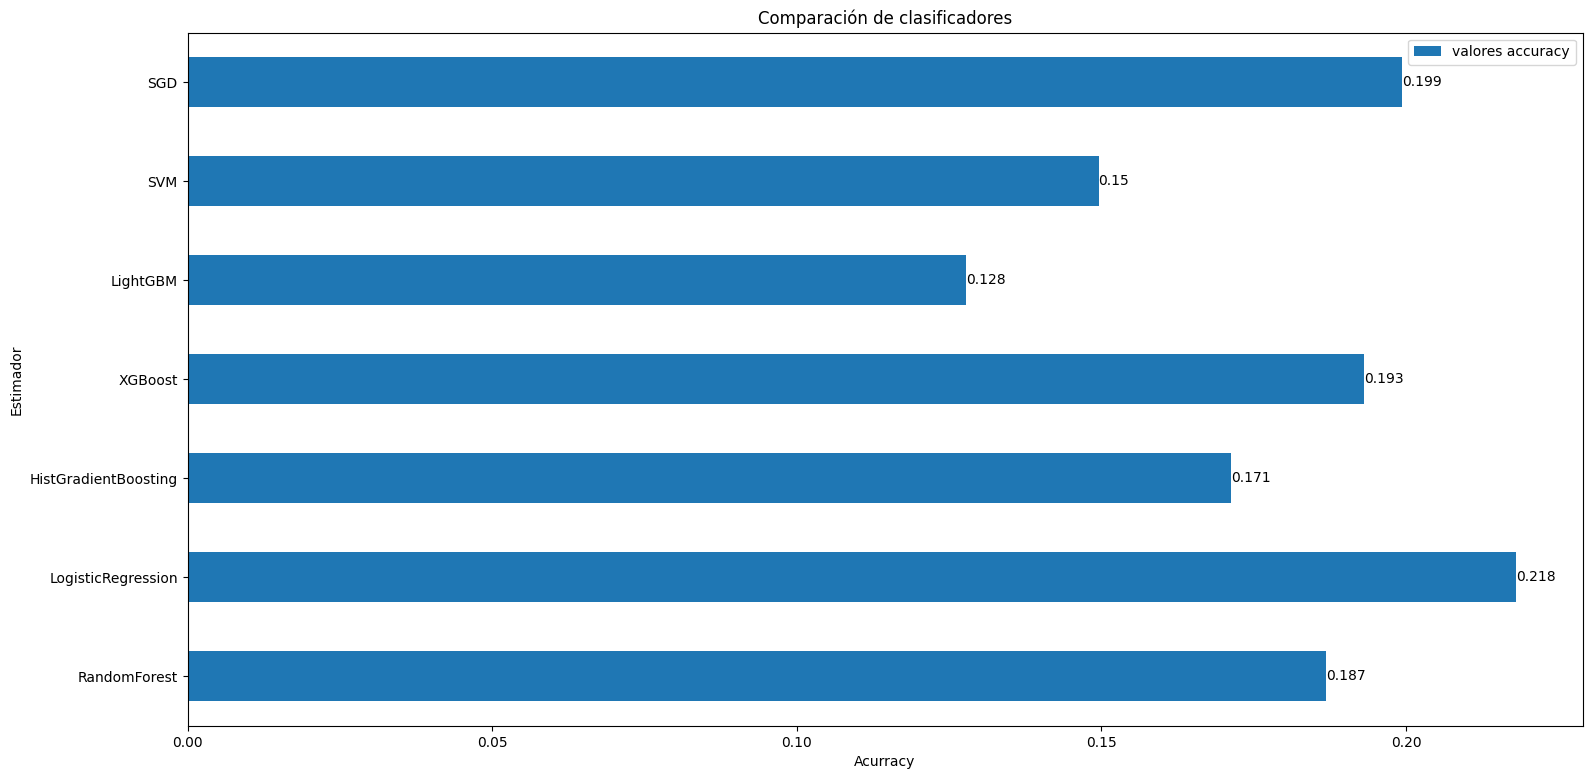

In [230]:
df_comparacion = pd.DataFrame({
                    'estimador': ['RandomForest', 'LogisticRegression', 'HistGradientBoosting', 'XGBoost', 'LightGBM', 'SVM', 'SGD'],
                    'valores accuracy': [forest_accuracy, logistic_accuracy, hist_accuracy, xgb_accuracy, light_accuracy, svm_accuracy, sgd_accuracy]
                 })

fig, ax = plt.subplots(figsize=(18, 9))
df_comparacion.set_index('estimador').plot(kind='barh', ax=ax)
ax.set_xlabel('Acurracy')
ax.set_ylabel('Estimador')
ax.set_title('Comparación de clasificadores');

for i, v in enumerate(df_comparacion['valores accuracy']):
    ax.annotate(str(round(v, 3)), xy=(v, i), va='center', ha='left', fontsize=10)

Ahora diseñamos todos los mejores modelos para probar su capacidad de generalización, con otros datos en el archivo `generalizacion.ipynb`.

In [25]:
preprocessor = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [32]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(
        alpha = 0.01,
        eta0 = 0.01,
        learning_rate = 'constant',
        loss = 'log_loss',
        penalty = 'l1'   
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/NO IMU/modelo_SGD.pkl', 'wb'))

In [26]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        bootstrap = True,
        n_estimators = 5
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/NO IMU/modelo_RF.pkl', 'wb'))

In [31]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        C = 50,
        gamma = 5,
        kernel = 'rbf'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/NO IMU/modelo_SVM.pkl', 'wb'))

In [27]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        C = 50,
        penalty = 'l2',
        solver = 'sag',
        class_weight='balanced'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/NO IMU/modelo_LR.pkl', 'wb'))

d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [28]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier(
        validation_fraction = 0.1,
        n_iter_no_change = 5,
        tol = 0.0001,
        l2_regularization = 1,
        learning_rate = 0.9,
        max_depth = 5,
        max_leaf_nodes = 10         
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/NO IMU/modelo_HIST.pkl', 'wb'))

In [29]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        learning_rate = 0.9,
        max_depth = 3,
        n_estimators = 401,
        subsample = 1        
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/NO IMU/modelo_XGB.pkl', 'wb'))

In [30]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(
        boosting_type = 'gbdt',
        force_col_wise = True,
        learning_rate = 0.9,
        max_depth = 10,
        n_estimators = 153,
        num_leaves = 50,
        subsample = 0.5      
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/NO IMU/modelo_LGBMC.pkl', 'wb'))

[LightGBM] [Info] Total Bins 1992
[LightGBM] [Info] Number of data points in the train set: 749, number of used features: 8
[LightGBM] [Info] Start training from score -1.955300
[LightGBM] [Info] Start training from score -1.936608
[LightGBM] [Info] Start training from score -1.936608
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.964779
[LightGBM] [Info] Start training from score -1.936608
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

# 4 GESTOS PALMA

In [3]:
path = "data_train_4G_palma.csv"

df = pd.read_csv(path)

In [4]:
np.random.seed(33)

## Análisis exploratorio de los datos EDA

Para poder entender y comprender los datos con los que vamos a trabajar debemos saber:
- Cuántas instancias y atributos hay.
- Qué tipo de atributos hay.
- Si faltan atributos.

In [5]:
df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ,TimeStamp,label
0,14228.018934,2516.672068,8759.775918,17912.609167,13565.332446,6672.190490,11427.609214,3816.264389,114.974822,161.032554,155.686549,0.004293,0.008734,0.003876,43:54.481843,0
1,14241.933025,2529.667441,8750.088925,17902.735433,13551.887216,6697.306678,11439.382437,3825.546816,114.318032,161.363879,156.577977,0.003550,0.005705,0.003185,43:54.730036,0
2,14242.383322,2531.197838,8750.011409,17901.926023,13552.131947,6692.886886,11438.034640,3825.203373,114.842731,161.108854,156.065241,0.003893,0.004714,0.002477,43:54.984387,0
3,14287.078773,2584.528776,8698.042694,17847.146320,13501.400470,6738.309668,11485.514839,3875.574744,114.701851,161.055139,156.587499,0.003663,0.006887,0.002060,43:55.230151,0
4,14336.418593,2630.144929,8656.078997,17804.410780,13458.709888,6785.315712,11518.672085,3914.279202,114.563534,161.126800,156.120909,0.003515,0.002250,0.002270,43:55.485744,0


In [6]:
print(df.shape)

(612, 16)


Obtenemos el número de gestos realizados, `label`

In [7]:
print("Gestos :", len(df["label"].unique()))
print()

Gestos : 4



0. Idle
1. Palma
2. Flexión
3. Extensión


Observamos que tipos de datos tenemos en cada columna de la base de datos

In [8]:
df.dtypes

CH1          float64
CH2          float64
CH3          float64
CH4          float64
CH5          float64
CH6          float64
CH7          float64
CH8          float64
AccX         float64
AccY         float64
AccZ         float64
GyX          float64
GyY          float64
GyZ          float64
TimeStamp     object
label          int64
dtype: object

Dividimos los datos en entrados y salidas, de la entrada eliminamos datos irrelevantes para el cálculo de la salida, en este caso el momento exacto, `TimeStamp`, en el que lo realiza y la propia salida, `label`.

In [5]:
X_df = df.drop(["label", "TimeStamp"], axis=1)
y_df = df["label"]

In [10]:
X_df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ
0,14228.018934,2516.672068,8759.775918,17912.609167,13565.332446,6672.190490,11427.609214,3816.264389,114.974822,161.032554,155.686549,0.004293,0.008734,0.003876
1,14241.933025,2529.667441,8750.088925,17902.735433,13551.887216,6697.306678,11439.382437,3825.546816,114.318032,161.363879,156.577977,0.003550,0.005705,0.003185
2,14242.383322,2531.197838,8750.011409,17901.926023,13552.131947,6692.886886,11438.034640,3825.203373,114.842731,161.108854,156.065241,0.003893,0.004714,0.002477
3,14287.078773,2584.528776,8698.042694,17847.146320,13501.400470,6738.309668,11485.514839,3875.574744,114.701851,161.055139,156.587499,0.003663,0.006887,0.002060
4,14336.418593,2630.144929,8656.078997,17804.410780,13458.709888,6785.315712,11518.672085,3914.279202,114.563534,161.126800,156.120909,0.003515,0.002250,0.002270


In [11]:
y_df.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [12]:
X_df.describe()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ
count,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000
mean,10546.179944,10897.227966,7987.791767,14574.612017,13228.205707,10300.654809,11876.885599,8022.633707,63.508151,156.963646,167.226119,0.057414,0.015990,0.014195
std,6637.466654,4193.686431,6878.900246,5042.186886,8140.140790,2402.142762,4579.511758,14628.743484,29.481888,53.224726,43.829484,0.131585,0.025566,0.017875
min,29.660622,2516.672068,139.751427,7918.421199,2937.473776,5706.341263,5911.057499,480.783204,2.468458,8.325124,2.190726,0.002094,0.001135,0.001064
25%,4074.389190,8531.087660,848.638162,9188.773749,4361.235704,8694.555987,7132.280282,2631.840157,44.844348,154.467977,141.777852,0.007231,0.004541,0.004527
50%,12177.625489,10044.387099,9220.076885,15815.043759,17139.270721,10450.932095,11742.921959,5626.320303,57.902056,169.026902,166.073664,0.013034,0.007038,0.007622
75%,16898.012580,12302.607305,12489.794853,18132.584826,21325.530683,12476.919571,17380.179702,7068.795005,76.926667,185.202685,189.147608,0.025772,0.014939,0.014787
max,19705.620923,23831.645247,24187.775744,25068.083853,27442.407256,14438.602934,17969.773059,135185.758864,143.986890,243.803526,252.074446,0.972397,0.234728,0.124204


Observamos si las salidas estan balanceadas

In [13]:
y_df.value_counts()

label
3    155
1    154
2    153
0    150
Name: count, dtype: int64

Observamos si hay valores nulos

In [14]:
X_df.isnull().any()

CH1     False
CH2     False
CH3     False
CH4     False
CH5     False
CH6     False
CH7     False
CH8     False
AccX    False
AccY    False
AccZ    False
GyX     False
GyY     False
GyZ     False
dtype: bool

In [15]:
X_df.isnull().sum()

CH1     0
CH2     0
CH3     0
CH4     0
CH5     0
CH6     0
CH7     0
CH8     0
AccX    0
AccY    0
AccZ    0
GyX     0
GyY     0
GyZ     0
dtype: int64

In [16]:
X_df.isnull().sum() / len(X_df) * 100

CH1     0.0
CH2     0.0
CH3     0.0
CH4     0.0
CH5     0.0
CH6     0.0
CH7     0.0
CH8     0.0
AccX    0.0
AccY    0.0
AccZ    0.0
GyX     0.0
GyY     0.0
GyZ     0.0
dtype: float64

In [17]:
y_df.isnull().any()

False

In [18]:
y_df.isnull().sum()

0

In [19]:
y_df.isnull().sum() / len(y_df) * 100

0.0

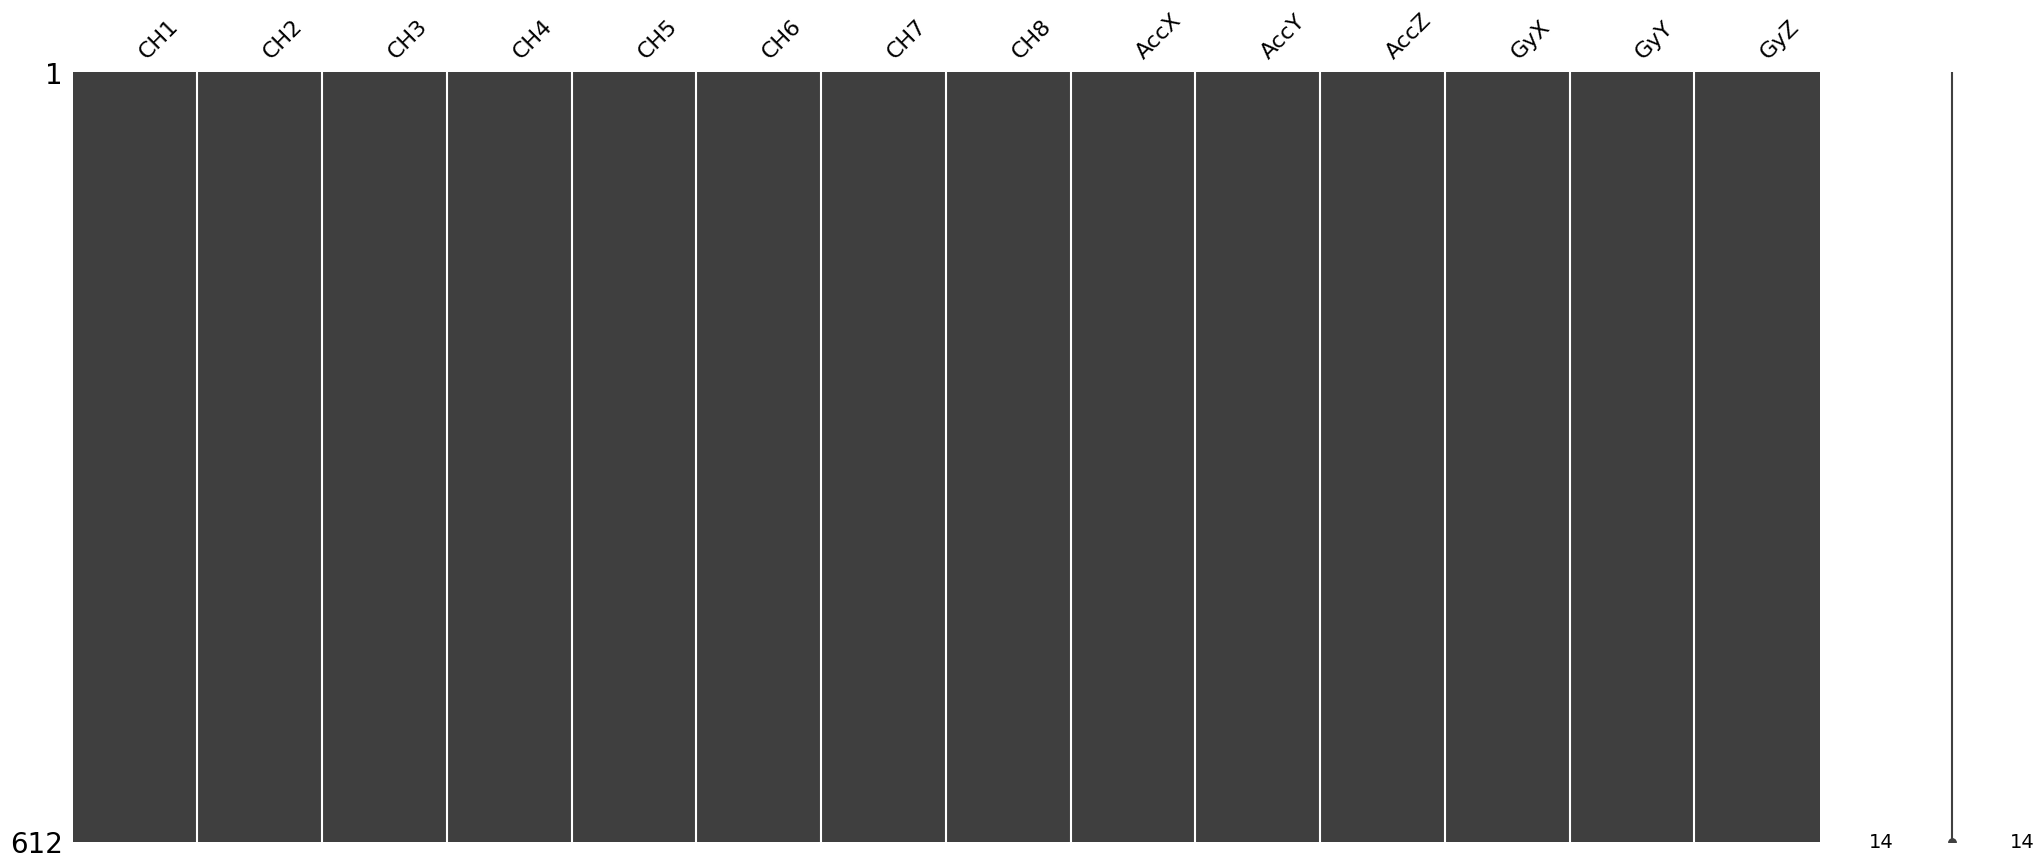

In [20]:
%config InlineBackend.figure_format = 'png'

msno.matrix(X_df)
plt.show()

Obtenemos la matriz de correlación entre las variables y la salida

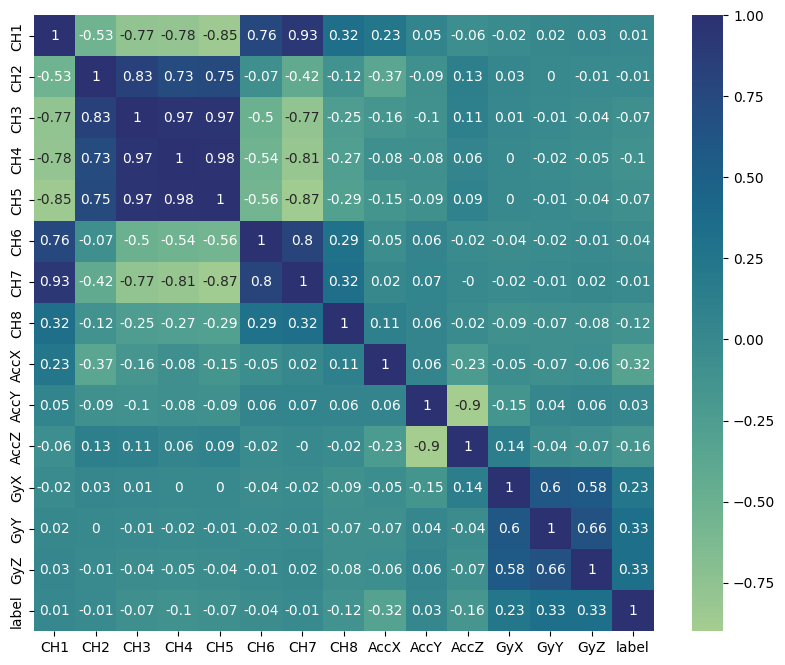

In [21]:
aux_df = df.drop(["TimeStamp"], axis=1)

plt.figure(figsize=(10, 8))

matriz_correlacion = aux_df.corr().round(2)
sns.heatmap(data=matriz_correlacion, annot=True, cmap="crest")

plt.show()

## PREPROCESADOR

Dividimos los datos en entrenamiento y test

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=False, test_size=0.3)

In [7]:
num_cols = x_train.select_dtypes(exclude="object").columns

1. Realizamos un `MinMaxScaler` para transformar los datos para que se encuentren dentro de un rango entre 0 y 1.
2. Realizamos un `RobustScaler` para escalar los datos de manera robusta frente a valores atípicos.

In [8]:
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols)
    ])

In [10]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                                 ('scaler2', RobustScaler())]),
                                 Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])

## RANDOM FOREST

In [11]:
random_forest_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight='balanced', random_state=33))])

In [12]:
random_forest_dist = {'classifier__n_estimators': [5, 10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 550],
                      'classifier__bootstrap': [True]}

random_forest_grid = GridSearchCV(random_forest_pipe,
                                   param_grid=random_forest_dist,
                                   n_jobs = multiprocessing.cpu_count() - 1,
                                   cv=3)

np.random.seed(33)

random_forest_grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=33))]),
             n_jobs=19,
             param_grid={'classifier__bootstrap': [True],
                         'classifier__n_estimators': [5, 10, 25, 50, 75, 100,
                                                      125, 150, 175, 200, 225,
                                                      250, 275, 300, 325, 350,
                                                      375, 400, 425, 450, 475,
                                                      500, 550]})

In [13]:
resultados = pd.DataFrame(random_forest_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__bootstrap,param_classifier__n_estimators,mean_test_score,std_test_score
3,True,50,0.729111,0.047947
4,True,75,0.719754,0.051772
9,True,200,0.719754,0.045036
8,True,175,0.717440,0.053657
5,True,100,0.717440,0.060511


In [14]:
random_forest_grid.best_score_

0.7291112643225319

In [15]:
random_forest_grid.best_params_

{'classifier__bootstrap': True, 'classifier__n_estimators': 50}

In [16]:
print(random_forest_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=50, random_state=33))])


In [17]:
modelo_final_forest = random_forest_grid.best_estimator_
y_test_pred = modelo_final_forest.predict(x_test)

In [18]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.60      0.33      0.42        46
           1       0.58      0.54      0.56        46
           2       1.00      0.89      0.94        45
           3       0.61      0.98      0.75        47

    accuracy                           0.68       184
   macro avg       0.70      0.68      0.67       184
weighted avg       0.69      0.68      0.67       184



In [19]:
forest_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {forest_accuracy}")

El valor de accuracy: 0.6847826086956522


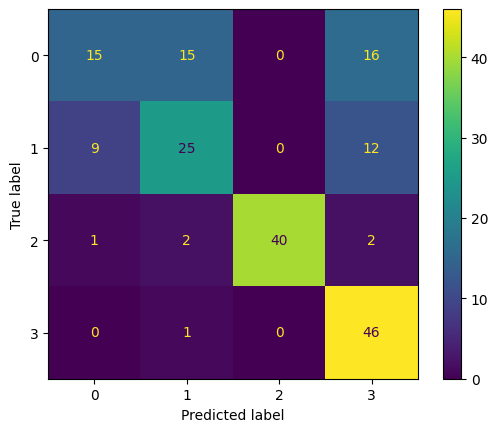

In [20]:
cm = confusion_matrix(y_test, y_test_pred, labels=random_forest_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_grid.classes_)
disp.plot()
plt.show()

## LOGISTIC REGRESSION

In [21]:
pipe_scale_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty=None, random_state = 33, class_weight='balanced'))])

In [22]:
logistic_dist = {
    'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150, 175, 200],
    'classifier__penalty': [None, 'l2'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}


logistic_grid = GridSearchCV(pipe_scale_lr,
                    param_grid = logistic_dist,
                    scoring='balanced_accuracy',
                    cv=3,
                    refit=True,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True,)

np.random.seed(33)

logistic_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           penalty=None,
                                                           random_state=33))]),
             n_jobs=-1,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__penalty': [None, 'l2'],
                         'classifier__solver': ['newton-cg', 'lbfgs', 'sag',
                                                'saga']},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [23]:
resultados = pd.DataFrame(logistic_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__penalty,param_classifier__solver,mean_test_score,std_test_score,mean_train_score,std_train_score
79,200,l2,saga,0.661387,0.077694,0.856046,0.031668
19,25,None,saga,0.661387,0.077694,0.856046,0.031668
67,175,None,saga,0.661387,0.077694,0.856046,0.031668
63,150,l2,saga,0.661387,0.077694,0.856046,0.031668
59,150,None,saga,0.661387,0.077694,0.856046,0.031668


In [24]:
logistic_grid.best_params_

{'classifier__C': 1, 'classifier__penalty': None, 'classifier__solver': 'saga'}

In [25]:
logistic_grid.best_score_

0.6613873327108621

In [26]:
print(logistic_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', penalty=None,
                                    random_state=33, solver='saga'))])


In [27]:
modelo_final_logistic = logistic_grid.best_estimator_
print("Intercept:", modelo_final_logistic['classifier'].intercept_)
print("Coeficientes:", list(zip(df.columns, modelo_final_logistic['classifier'].coef_.flatten(), )))
print("Accuracy de test:", modelo_final_logistic.score(x_test, y_test))

Intercept: [ 0.48715045  0.18712202 -0.3068437  -0.36742877]
Coeficientes: [('CH1', 0.011838619708595236), ('CH2', 0.2184762316491585), ('CH3', 0.18606430020755557), ('CH4', 0.09403280229540592), ('CH5', 0.06324369699238819), ('CH6', 0.24903981254909782), ('CH7', 0.13653898263144176), ('CH8', -0.45607276351645126), ('AccX', 0.834893492323188), ('AccY', 0.45028112859890534), ('AccZ', -0.2732794102069779), ('GyX', -1.0324604397173676), ('GyY', -0.1887831727790182), ('GyZ', -0.2967139797409772), ('TimeStamp', -0.4316512009251383), ('label', 0.008430584562262769)]
Accuracy de test: 0.6467391304347826


In [28]:
y_test_pred = modelo_final_logistic.predict(x_test)

In [29]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.59      0.48      0.53        46
           1       0.93      0.28      0.43        46
           2       0.57      0.84      0.68        45
           3       0.70      0.98      0.81        47

    accuracy                           0.65       184
   macro avg       0.70      0.65      0.61       184
weighted avg       0.70      0.65      0.61       184



In [30]:
logistic_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {logistic_accuracy}")

El valor de accuracy: 0.6467391304347826


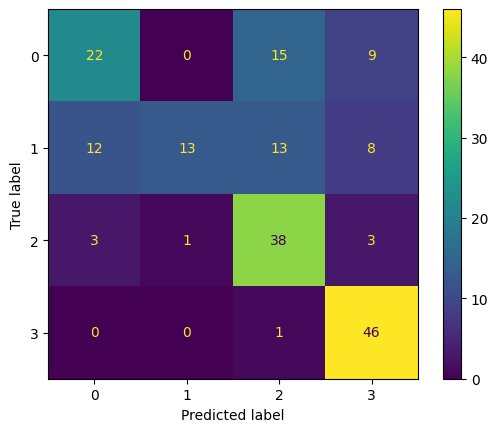

In [31]:
cm = confusion_matrix(y_test, y_test_pred, labels=logistic_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_grid.classes_)
disp.plot()
plt.show()

## BOOSTING


### HistGradientBoost

In [32]:
hist_gradient_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', HistGradientBoostingClassifier(random_state=33, 
                                                                    max_iter=1000,
                                                                    validation_fraction=0.1,
                                                                    n_iter_no_change=5,
                                                                    tol=0.0001))
                    ])

In [33]:
hist_gradient_dist = {'classifier__max_depth' : [None, 1, 3, 5, 7, 10, 25, 50, 75, 100],
              'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9],
              'classifier__l2_regularization' : [0, 1],
              'classifier__max_leaf_nodes': [5, 10, 25, 50, 75, 100]
             }

hist_gradient_grid = GridSearchCV(hist_gradient_pipe,
                           param_grid = hist_gradient_dist,
                           scoring='balanced_accuracy',
                           cv=3,
                           refit=True,
                           n_jobs=-1,
                           verbose=1,
                           return_train_score=True)

np.random.seed(33)

hist_gradient_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 840 candidates, totalling 2520 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        HistGradientBoostingClassifier(max_iter=1000,
                                                                       n_iter_no_change=5,
                                                                       random_state=33,
                                                                       tol=0.0001))]),
             n_jobs=-1,
             param_grid={'classifier__l2_regularization': [0, 1],
                         'classifier__learning_rate': [0.001, 0.01, 0.1, 0.3,
                                                       0.5, 0.7, 0.9],
                         'classifier__max_depth': [None, 1, 3, 5, 7, 10, 25, 50,
                                                   75, 100],
                         'classifier__max_leaf_nodes': [5, 10, 25, 50, 75,
                                                        100]},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [34]:
resultados = pd.DataFrame(hist_gradient_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__l2_regularization,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__max_leaf_nodes,mean_test_score,std_test_score,mean_train_score,std_train_score
277,0,0.5,25,10,0.719059,0.062339,1.0,0.0
295,0,0.5,100,10,0.719059,0.062339,1.0,0.0
283,0,0.5,50,10,0.719059,0.062339,1.0,0.0
241,0,0.5,None,10,0.719059,0.062339,1.0,0.0
271,0,0.5,10,10,0.719059,0.062339,1.0,0.0


In [35]:
hist_gradient_grid.best_params_

{'classifier__l2_regularization': 0,
 'classifier__learning_rate': 0.5,
 'classifier__max_depth': None,
 'classifier__max_leaf_nodes': 10}

In [36]:
hist_gradient_grid.best_score_

0.7190592903828197

In [37]:
print(hist_gradient_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 HistGradientBoostingClassifier(l2_regularization=0,
                                                learning_rate=0.5,
                                                max_iter=1000,
                                                max_leaf_nodes=10,
                                                n_iter_no_change=5,
                           

In [38]:
modelo_final_hist = hist_gradient_grid.best_estimator_
y_test_pred = modelo_final_hist.predict(x_test)

In [39]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.33      0.45        46
           1       0.86      0.41      0.56        46
           2       0.68      0.84      0.75        45
           3       0.53      0.98      0.69        47

    accuracy                           0.64       184
   macro avg       0.71      0.64      0.61       184
weighted avg       0.71      0.64      0.61       184



In [40]:
hist_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {hist_accuracy}")

El valor de accuracy: 0.6413043478260869


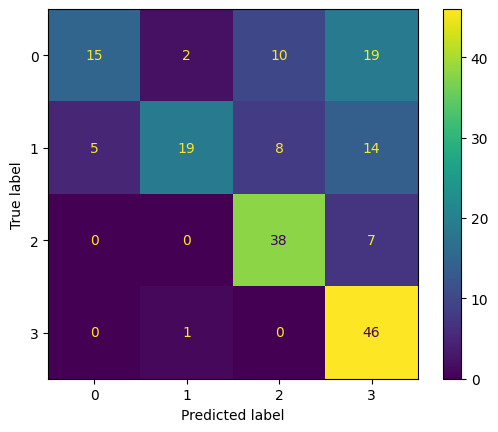

In [41]:
cm = confusion_matrix(y_test, y_test_pred, labels=hist_gradient_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=hist_gradient_grid.classes_)
disp.plot()
plt.show()

### XGBOOST

In [42]:
boost_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier(random_state=33))])

In [43]:
XGBoost_dist = {'classifier__max_depth'      : [3, 5, 7, 9, 11, 13, 15, 25, 50, 75, 100],
              'classifier__subsample'        : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__learning_rate'    : [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__n_estimators'     : sp_randint(10, 500).rvs(5)
              }

XGBoost_grid = GridSearchCV(boost_pipe,
    param_grid= XGBoost_dist,
    scoring    = 'balanced_accuracy',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = 3,
    refit      = True,
    verbose    = 0
)

np.random.seed(33)

XGBoost_grid.fit(X = x_train, y = y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callback...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=33, ...))]),
             n_jobs=19,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7,
                                                       0.9, 1],
                         'classifier__max_depth': [3, 5, 7, 9, 11, 13, 15, 25,
                                                   50, 75, 100],
                         'classifier__n_estimators': array([ 30, 401, 226,  76, 156], dtype=int64),
                         'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1]},
             scoring='balanced_accuracy')

In [44]:
resultados = pd.DataFrame(XGBoost_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__subsample,mean_test_score,std_test_score
24,0.01,3,156,0.1,0.735987,0.078684
66,0.01,7,401,0.1,0.733874,0.104521
276,0.01,75,401,0.1,0.733874,0.104521
156,0.01,13,401,0.1,0.733874,0.104521
126,0.01,11,401,0.1,0.733874,0.104521


In [45]:
XGBoost_grid.best_params_

{'classifier__learning_rate': 0.01,
 'classifier__max_depth': 3,
 'classifier__n_estimators': 156,
 'classifier__subsample': 0.1}

In [46]:
XGBoost_grid.best_score_

0.7359866168689697

In [47]:
print(XGBoost_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=Non...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
            

In [48]:
modelo_final_xgb = XGBoost_grid.best_estimator_
y_test_pred = modelo_final_xgb.predict(x_test)

In [49]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70        46
           1       0.82      0.50      0.62        46
           2       0.88      0.80      0.84        45
           3       0.63      0.98      0.77        47

    accuracy                           0.74       184
   macro avg       0.77      0.74      0.73       184
weighted avg       0.77      0.74      0.73       184



In [50]:
xgb_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {xgb_accuracy}")

El valor de accuracy: 0.7391304347826086


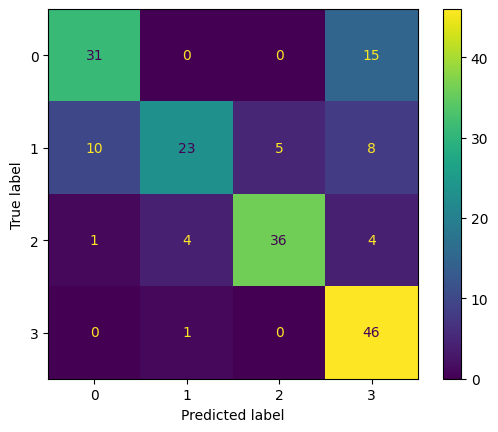

In [51]:
cm = confusion_matrix(y_test, y_test_pred, labels=XGBoost_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGBoost_grid.classes_)
disp.plot()
plt.show()

### LightGBM

In [52]:
light_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier(random_state=33))])

In [53]:
light_dist = {
    'classifier__max_depth': [3, 5, 7, 10, 25, 50, 100],
    'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
    'classifier__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'classifier__n_estimators': sp_randint(10, 500),
    'classifier__num_leaves': [3, 5, 7, 10, 25, 50, 100],
    'classifier__boosting_type': ['gbdt', 'rf'],
    'classifier__force_col_wise': [True],
}

light_grid = RandomizedSearchCV(light_pipe,
        param_distributions= light_dist,
        scoring    = 'balanced_accuracy',
        n_jobs     =  multiprocessing.cpu_count() - 1,
        cv         = 3, 
        refit      = True,
        verbose    = 1,
        return_train_score = True,
        n_iter= 500
       )

np.random.seed(33)
light_grid.fit(X = x_train, y = y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[LightGBM] [Info] Total Bins 2002
[LightGBM] [Info] Number of data points in the train set: 428, number of used features: 14
[LightGBM] [Info] Start training from score -1.414732
[LightGBM] [Info] Start training from score -1.376992
[LightGBM] [Info] Start training from score -1.376992
[LightGBM] [Info] Start training from score -1.376992
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
723 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
723 fits failed with the following error:
Traceback (most recent call last):
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, 

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                MinMaxScaler()),
                                                                                               ('scaler2',
                                                                                                RobustScaler())]),
                                                                               Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                             ('classifier',
                                              LGBMClassifier(random_state=33))]),
                   n_iter=500...
                                        'classifier__learning_rate': [0.1, 0.3,
                                                                      0.5, 0.7,
                                                                      0.9],
                                        'classifier__max_depth': [3, 5, 7, 10,
                                                                  25, 50, 100],
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002014E1B5310>,
                                        'classifier__num_leaves': [3, 5, 7, 10,
                                                                   25, 50,
                                                                   100],
                                        'classifier__subsample': [0.1, 0.3, 0.5,
                                                                  0.7, 0.9,
                                                                  1]},
                   return_train_score=True, scoring='balanced_accuracy',
                   verbose=1)

In [54]:
resultados = pd.DataFrame(light_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__boosting_type,param_classifier__force_col_wise,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__num_leaves,param_classifier__subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
195,gbdt,True,0.5,10,48,7,0.7,0.737640,0.066891,1.0,0.0
386,gbdt,True,0.5,7,176,7,0.3,0.730696,0.064586,1.0,0.0
116,gbdt,True,0.5,7,436,7,1,0.730696,0.064586,1.0,0.0
453,gbdt,True,0.5,25,168,7,0.5,0.730696,0.064586,1.0,0.0
248,gbdt,True,0.5,25,165,7,0.3,0.730696,0.064586,1.0,0.0


In [55]:
light_grid.best_params_

{'classifier__boosting_type': 'gbdt',
 'classifier__force_col_wise': True,
 'classifier__learning_rate': 0.5,
 'classifier__max_depth': 10,
 'classifier__n_estimators': 48,
 'classifier__num_leaves': 7,
 'classifier__subsample': 0.7}

In [56]:
light_grid.best_score_

0.7376400560224091

In [57]:
print(light_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(force_col_wise=True, learning_rate=0.5,
                                max_depth=10, n_estimators=48, num_leaves=7,
                                random_state=33, subsample=0.7))])


In [58]:
modelo_final_light = light_grid.best_estimator_
y_test_pred = modelo_final_light.predict(x_test)

In [59]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.08      0.02      0.03        46
           1       0.56      0.59      0.57        46
           2       1.00      0.82      0.90        45
           3       0.50      0.91      0.65        47

    accuracy                           0.59       184
   macro avg       0.53      0.59      0.54       184
weighted avg       0.53      0.59      0.54       184



In [60]:
light_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {light_accuracy}")

El valor de accuracy: 0.5869565217391305


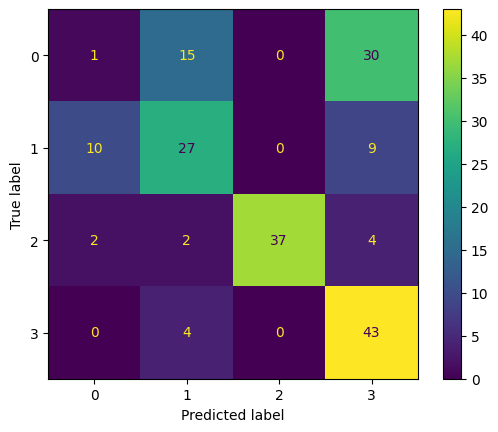

In [61]:
cm = confusion_matrix(y_test, y_test_pred, labels=light_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=light_grid.classes_)
disp.plot()
plt.show()

## SVM

In [62]:
svm_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

In [63]:
svm_param_dist = {
    'classifier__C': [ 1, 10, 25, 50, 75, 100, 125, 150, 175, 200],  
    'classifier__kernel': ['linear', 'rbf'], 
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 5, 10]
}

svm_grid = GridSearchCV(
    svm_pipe,
    param_grid=svm_param_dist,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

svm_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier', SVC())]),
             n_jobs=19,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__gamma': ['scale', 'auto', 0.001, 0.01,
                                               0.1, 1, 5, 10],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='balanced_accuracy')

In [64]:
resultados = pd.DataFrame(svm_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__gamma,param_classifier__kernel,mean_test_score,std_test_score
149,200,0.001,rbf,0.684535,0.073160
53,50,0.001,rbf,0.675276,0.061248
101,125,0.001,rbf,0.675276,0.072216
133,175,0.001,rbf,0.675276,0.077694
69,75,0.001,rbf,0.672961,0.062084


In [65]:
svm_grid.best_params_

{'classifier__C': 200, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}

In [66]:
svm_grid.best_score_

0.6845354808590103

In [67]:
print(svm_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier', SVC(C=200, gamma=0.001))])


In [68]:
modelo_final_svm = svm_grid.best_estimator_

In [69]:
y_test_pred = modelo_final_svm.predict(x_test)

In [70]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.61      0.54      0.57        46
           1       0.82      0.39      0.53        46
           2       0.68      0.84      0.75        45
           3       0.71      0.98      0.82        47

    accuracy                           0.69       184
   macro avg       0.70      0.69      0.67       184
weighted avg       0.70      0.69      0.67       184



In [71]:
svm_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {svm_accuracy}")

El valor de accuracy: 0.6902173913043478


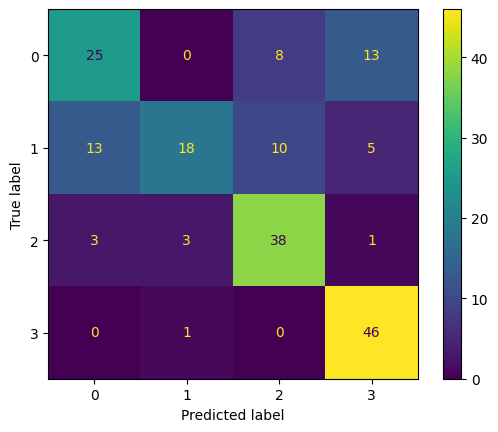

In [72]:
cm = confusion_matrix(y_test, y_test_pred, labels=svm_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_grid.classes_)
disp.plot()
plt.show()

## SGD


In [73]:
sgd_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SGDClassifier())])

In [74]:
sgd_params = {
    'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 0.00001],   
    'classifier__penalty': ['l1', 'l2', 'elasticnet', None],        
    'classifier__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'], 
    'classifier__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
      'classifier__eta0': [0.001, 0.01, 0.1]  
}

sgd_grid = GridSearchCV(sgd_pipe,
    param_grid=sgd_params,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

sgd_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier', SGDClassifier())]),
             n_jobs=19,
             param_grid={'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'classifier__eta0': [0.001, 0.01, 0.1],
                         'classifier__learning_rate': ['constant', 'optimal',
                                                       'invscaling',
                                                       'adaptive'],
                         'classifier__loss': ['hinge', 'log_loss',
                                              'modified_huber', 'squared_hinge',
                                              'perceptron'],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 None]},
             scoring='balanced_accuracy')

In [75]:
resultados = pd.DataFrame(sgd_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__alpha,param_classifier__eta0,param_classifier__learning_rate,param_classifier__loss,param_classifier__penalty,mean_test_score,std_test_score
48,0.1,0.001,invscaling,modified_huber,l1,0.771378,0.084911
52,0.1,0.001,invscaling,squared_hinge,l1,0.771378,0.084911
126,0.1,0.01,invscaling,log_loss,elasticnet,0.766682,0.081846
206,0.1,0.1,invscaling,log_loss,elasticnet,0.750615,0.084760
1084,0.00001,0.01,invscaling,log_loss,l1,0.744857,0.059064


In [76]:
sgd_grid.best_params_

{'classifier__alpha': 0.1,
 'classifier__eta0': 0.001,
 'classifier__learning_rate': 'invscaling',
 'classifier__loss': 'modified_huber',
 'classifier__penalty': 'l1'}

In [77]:
sgd_grid.best_score_

0.7713779956427015

In [78]:
print(sgd_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 SGDClassifier(alpha=0.1, eta0=0.001,
                               learning_rate='invscaling',
                               loss='modified_huber', penalty='l1'))])


In [79]:
modelo_final_sgd = sgd_grid.best_estimator_
y_test_pred = modelo_final_sgd.predict(x_test)

In [80]:
print(classification_report(y_test, y_test_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.63      0.80      0.70        46
           1       1.00      0.00      0.00        46
           2       0.77      0.82      0.80        45
           3       0.61      1.00      0.76        47

    accuracy                           0.66       184
   macro avg       0.75      0.66      0.56       184
weighted avg       0.75      0.66      0.56       184



In [81]:
sgd_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {sgd_accuracy}")

El valor de accuracy: 0.657608695652174


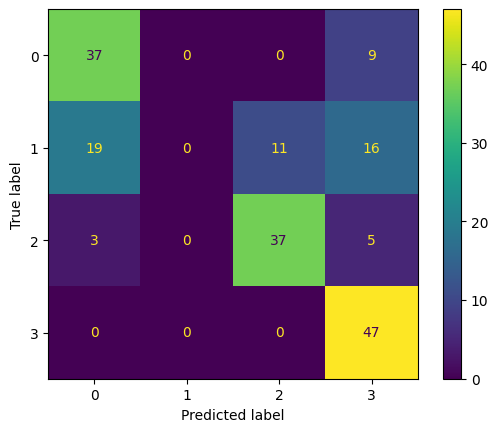

In [82]:
cm = confusion_matrix(y_test, y_test_pred, labels=sgd_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_grid.classes_)
disp.plot()
plt.show()

## ELECCION DEL MEJOR MODELO

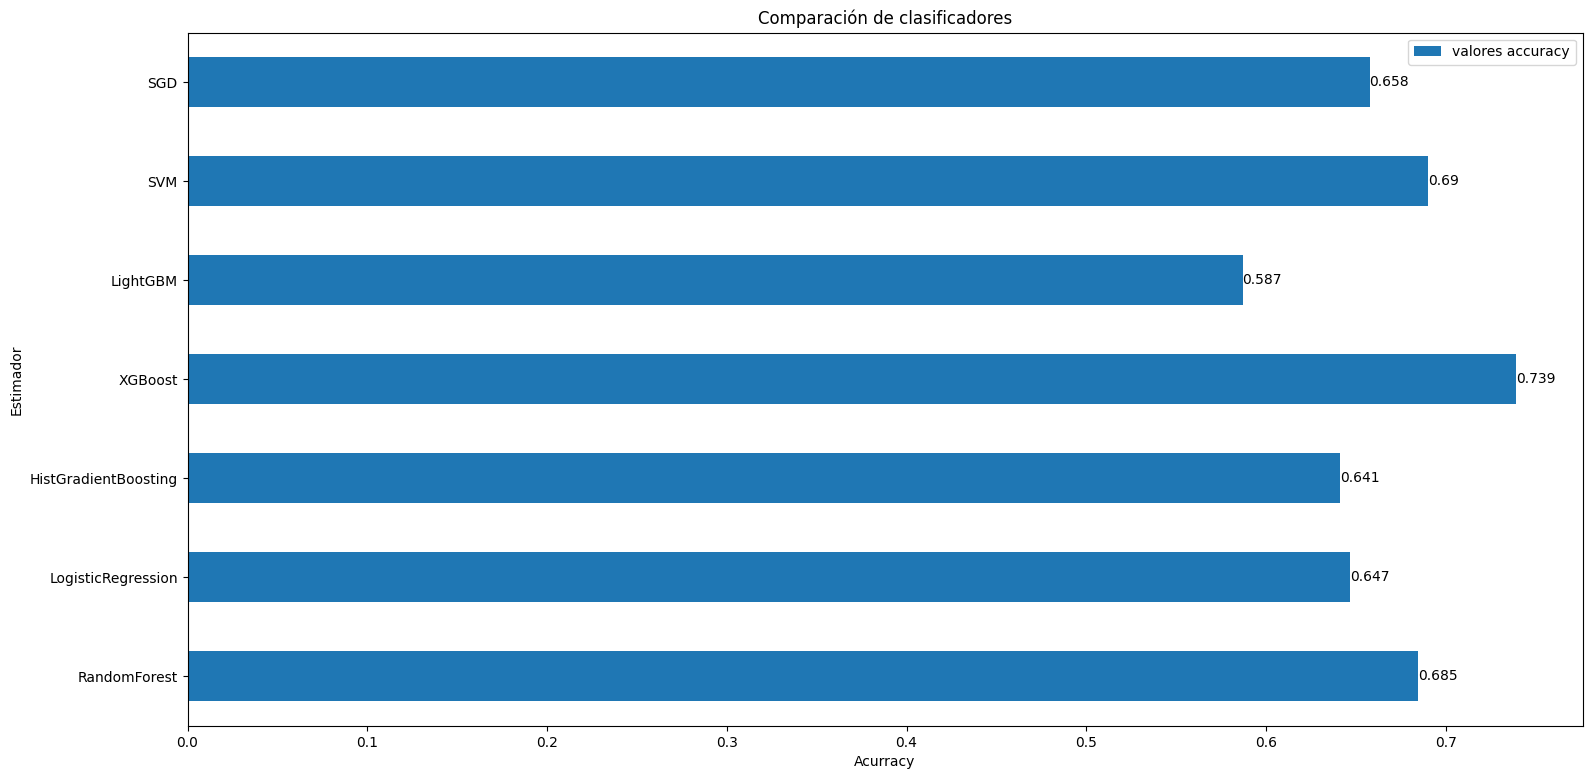

In [83]:
df_comparacion = pd.DataFrame({
                    'estimador': ['RandomForest', 'LogisticRegression', 'HistGradientBoosting', 'XGBoost', 'LightGBM', 'SVM', 'SGD'],
                    'valores accuracy': [forest_accuracy, logistic_accuracy, hist_accuracy, xgb_accuracy, light_accuracy, svm_accuracy, sgd_accuracy]
                 })

fig, ax = plt.subplots(figsize=(18, 9))
df_comparacion.set_index('estimador').plot(kind='barh', ax=ax)
ax.set_xlabel('Acurracy')
ax.set_ylabel('Estimador')
ax.set_title('Comparación de clasificadores');

for i, v in enumerate(df_comparacion['valores accuracy']):
    ax.annotate(str(round(v, 3)), xy=(v, i), va='center', ha='left', fontsize=10)

Ahora diseñamos todos los mejores modelos para probar su capacidad de generalización, con otros datos en el archivo `generalizacion.ipynb`.

In [103]:
preprocessor = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [104]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(
        alpha = 0.1,
        eta0 = 0.001,
        learning_rate = 'invscaling',
        loss = 'modified_huber',
        penalty = 'l1'   
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/4 GESTOS PALMA/modelo_sgd.pkl', 'wb'))

In [110]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        bootstrap = True,
        n_estimators = 50
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/4 GESTOS PALMA/modelo_RF.pkl', 'wb'))

In [105]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        C = 200,
        gamma = 0.001,
        kernel = 'rbf'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/4 GESTOS PALMA/modelo_SVM.pkl', 'wb'))

In [109]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        C = 1,
        penalty = None,
        solver = 'saga',
        class_weight='balanced'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/4 GESTOS PALMA/modelo_LR.pkl', 'wb'))

d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [108]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier(
        validation_fraction = 0.1,
        n_iter_no_change = 5,
        tol = 0.0001,
        l2_regularization = 0,
        learning_rate = 0.5,
        max_depth = None,
        max_leaf_nodes = 10         
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/4 GESTOS PALMA/modelo_HIST.pkl', 'wb'))

In [107]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        learning_rate = 0.01,
        max_depth = 3,
        n_estimators = 156,
        subsample = 0.1        
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/4 GESTOS PALMA/modelo_XGB.pkl', 'wb'))

In [106]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(
        boosting_type = 'gbdt',
        force_col_wise = True,
        learning_rate = 0.5,
        max_depth = 10,
        n_estimators = 48,
        num_leaves = 7,
        subsample = 0.7      
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/4 GESTOS PALMA/modelo_LGBMC.pkl', 'wb'))

[LightGBM] [Info] Total Bins 2002
[LightGBM] [Info] Number of data points in the train set: 428, number of used features: 14
[LightGBM] [Info] Start training from score -1.414732
[LightGBM] [Info] Start training from score -1.376992
[LightGBM] [Info] Start training from score -1.376992
[LightGBM] [Info] Start training from score -1.376992
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

# 4 GESTOS PUÑO

In [4]:
path = "data_train_4G_puño.csv"

df = pd.read_csv(path)

In [5]:
np.random.seed(33)

## Análisis exploratorio de los datos EDA

Para poder entender y comprender los datos con los que vamos a trabajar debemos saber:
- Cuántas instancias y atributos hay.
- Qué tipo de atributos hay.
- Si faltan atributos.

In [6]:
df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ,TimeStamp,label
0,14228.018934,2516.672068,8759.775918,17912.609167,13565.332446,6672.190490,11427.609214,3816.264389,114.974822,161.032554,155.686549,0.004293,0.008734,0.003876,43:54.481843,0
1,14241.933025,2529.667441,8750.088925,17902.735433,13551.887216,6697.306678,11439.382437,3825.546816,114.318032,161.363879,156.577977,0.003550,0.005705,0.003185,43:54.730036,0
2,14242.383322,2531.197838,8750.011409,17901.926023,13552.131947,6692.886886,11438.034640,3825.203373,114.842731,161.108854,156.065241,0.003893,0.004714,0.002477,43:54.984387,0
3,14287.078773,2584.528776,8698.042694,17847.146320,13501.400470,6738.309668,11485.514839,3875.574744,114.701851,161.055139,156.587499,0.003663,0.006887,0.002060,43:55.230151,0
4,14336.418593,2630.144929,8656.078997,17804.410780,13458.709888,6785.315712,11518.672085,3914.279202,114.563534,161.126800,156.120909,0.003515,0.002250,0.002270,43:55.485744,0


In [7]:
print(df.shape)

(611, 16)


Obtenemos el número de gestos realizados, `label`

In [8]:
print("Gestos :", len(df["label"].unique()))
print()

Gestos : 4



0. Idle
1. Puño
2. Flexión
3. Extensión


Observamos que tipos de datos tenemos en cada columna de la base de datos

In [9]:
df.dtypes

CH1          float64
CH2          float64
CH3          float64
CH4          float64
CH5          float64
CH6          float64
CH7          float64
CH8          float64
AccX         float64
AccY         float64
AccZ         float64
GyX          float64
GyY          float64
GyZ          float64
TimeStamp     object
label          int64
dtype: object

Dividimos los datos en entrados y salidas, de la entrada eliminamos datos irrelevantes para el cálculo de la salida, en este caso el momento exacto, `TimeStamp`, en el que lo realiza y la propia salida, `label`.

In [10]:
X_df = df.drop(["label", "TimeStamp"], axis=1)
y_df = df["label"]

In [11]:
X_df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ
0,14228.018934,2516.672068,8759.775918,17912.609167,13565.332446,6672.190490,11427.609214,3816.264389,114.974822,161.032554,155.686549,0.004293,0.008734,0.003876
1,14241.933025,2529.667441,8750.088925,17902.735433,13551.887216,6697.306678,11439.382437,3825.546816,114.318032,161.363879,156.577977,0.003550,0.005705,0.003185
2,14242.383322,2531.197838,8750.011409,17901.926023,13552.131947,6692.886886,11438.034640,3825.203373,114.842731,161.108854,156.065241,0.003893,0.004714,0.002477
3,14287.078773,2584.528776,8698.042694,17847.146320,13501.400470,6738.309668,11485.514839,3875.574744,114.701851,161.055139,156.587499,0.003663,0.006887,0.002060
4,14336.418593,2630.144929,8656.078997,17804.410780,13458.709888,6785.315712,11518.672085,3914.279202,114.563534,161.126800,156.120909,0.003515,0.002250,0.002270


In [12]:
y_df.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [13]:
X_df.describe()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,11622.179813,10915.520759,8056.418601,14681.380317,13294.666045,10308.071593,11895.391264,4749.499368,60.320075,159.498655,165.934021,0.057625,0.016791,0.014657
std,9766.747136,4332.694003,6971.343890,5117.598420,8185.233155,2465.838307,4551.750454,2759.076424,28.758843,53.696153,43.598712,0.131541,0.025816,0.017989
min,29.660622,2516.672068,139.751427,8029.783439,3023.975367,5501.020475,5911.057499,480.783204,2.468458,8.325124,2.190726,0.002094,0.001216,0.001064
25%,3570.540309,8502.575203,843.890546,9203.664944,4466.823053,8439.643824,7166.184554,1808.641035,43.460480,156.265574,142.519244,0.007044,0.004549,0.004751
50%,14323.057635,10041.657170,9206.761671,15836.832447,17138.591376,10542.189754,12339.873275,5318.322255,53.398402,176.767079,164.521356,0.013015,0.007275,0.008010
75%,17046.247736,12314.282846,12497.641539,18162.277806,21332.852723,12487.877642,17387.246494,6708.091157,70.918347,187.898638,186.952580,0.027047,0.016677,0.015948
max,89471.632677,23831.645247,24187.775744,25068.083853,27442.407256,14438.602934,17992.319469,11767.637920,128.159950,243.803526,252.074446,0.972397,0.234728,0.124204


Observamos si las salidas estan balanceadas

In [14]:
y_df.value_counts()

label
2    153
1    153
3    153
0    152
Name: count, dtype: int64

Observamos si hay valores nulos

In [15]:
X_df.isnull().any()

CH1     False
CH2     False
CH3     False
CH4     False
CH5     False
CH6     False
CH7     False
CH8     False
AccX    False
AccY    False
AccZ    False
GyX     False
GyY     False
GyZ     False
dtype: bool

In [16]:
X_df.isnull().sum()

CH1     0
CH2     0
CH3     0
CH4     0
CH5     0
CH6     0
CH7     0
CH8     0
AccX    0
AccY    0
AccZ    0
GyX     0
GyY     0
GyZ     0
dtype: int64

In [17]:
X_df.isnull().sum() / len(X_df) * 100

CH1     0.0
CH2     0.0
CH3     0.0
CH4     0.0
CH5     0.0
CH6     0.0
CH7     0.0
CH8     0.0
AccX    0.0
AccY    0.0
AccZ    0.0
GyX     0.0
GyY     0.0
GyZ     0.0
dtype: float64

In [18]:
y_df.isnull().any()

False

In [19]:
y_df.isnull().sum()

0

In [20]:
y_df.isnull().sum() / len(y_df) * 100

0.0

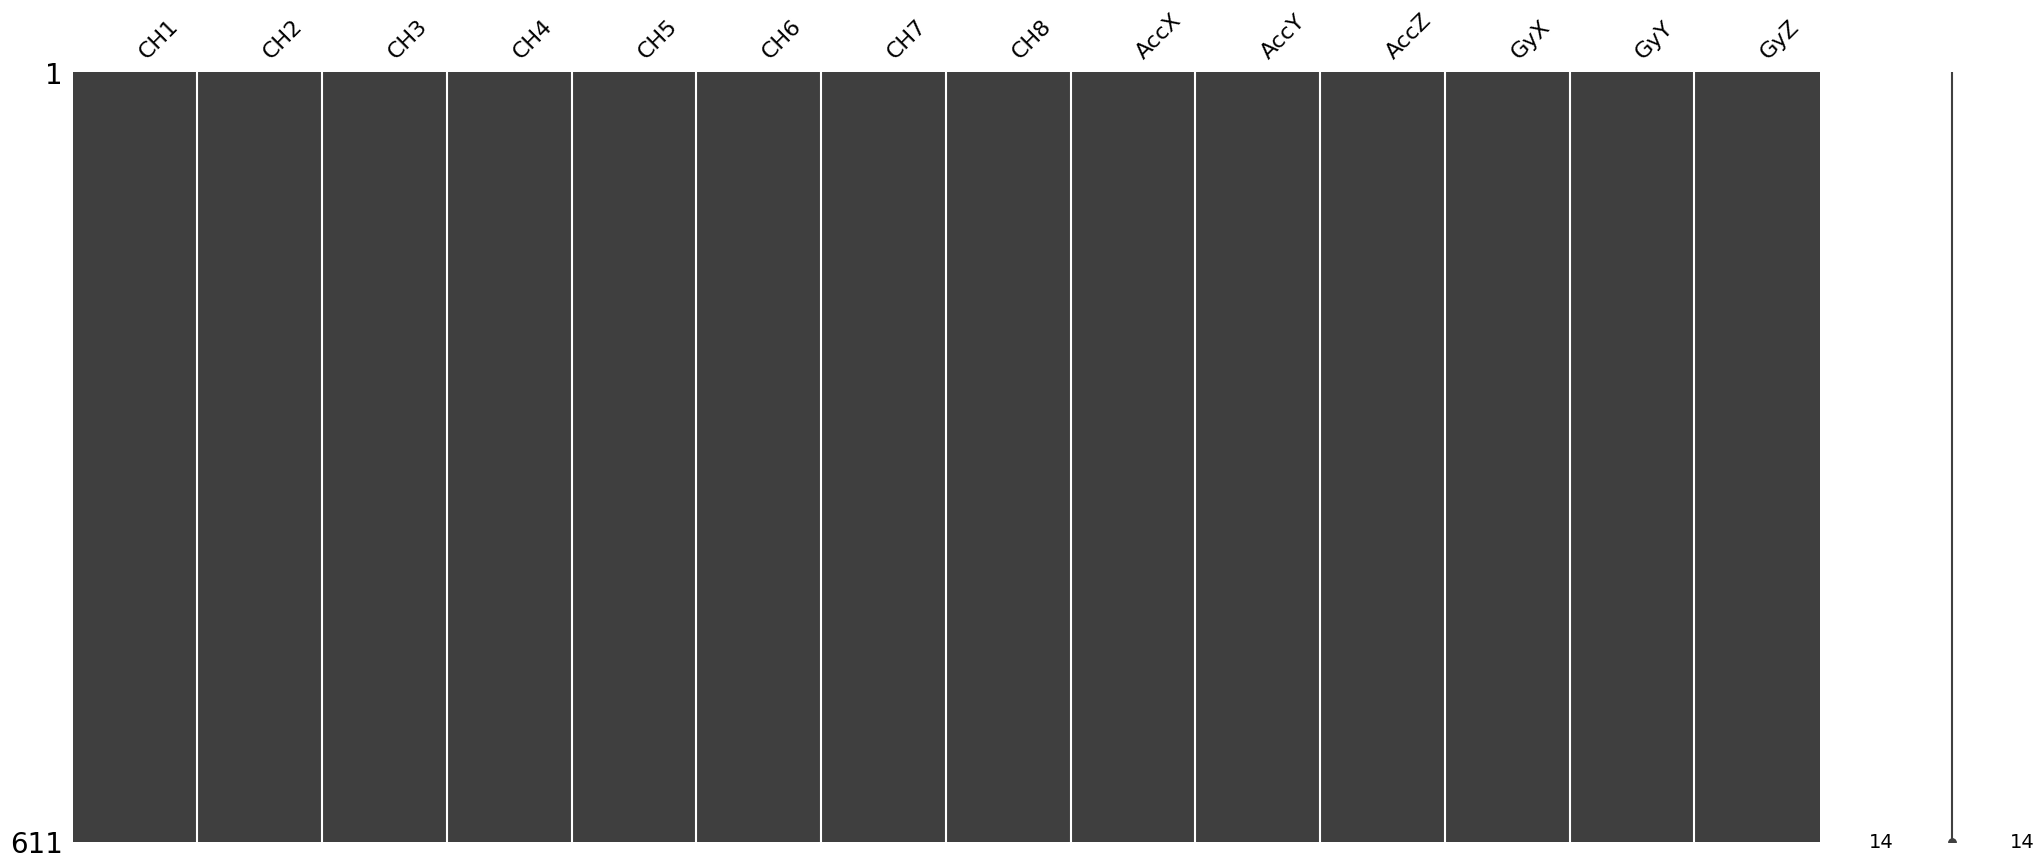

In [21]:
%config InlineBackend.figure_format = 'png'

msno.matrix(X_df)
plt.show()

Obtenemos la matriz de correlación entre las variables y la salida

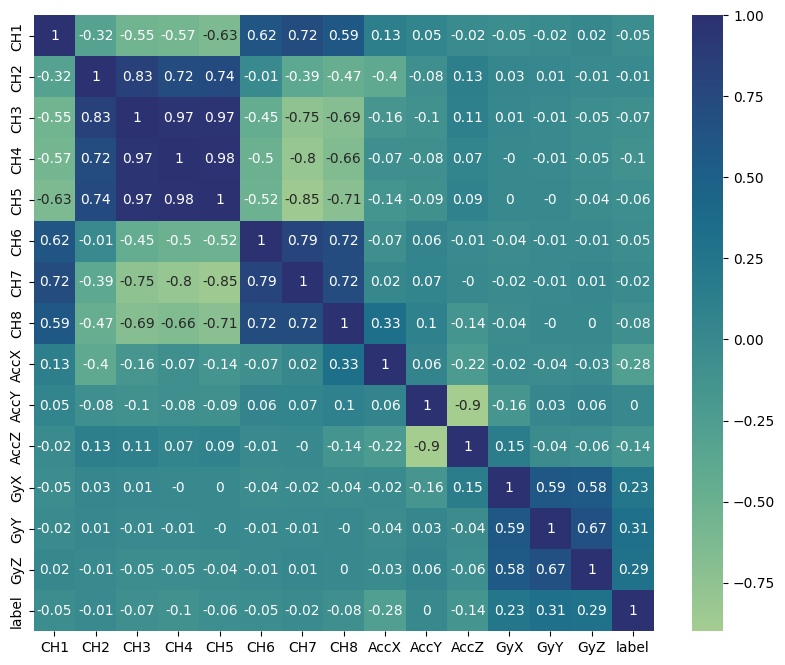

In [22]:
aux_df = df.drop(["TimeStamp"], axis=1)

plt.figure(figsize=(10, 8))

matriz_correlacion = aux_df.corr().round(2)
sns.heatmap(data=matriz_correlacion, annot=True, cmap="crest")

plt.show()

## PREPROCESADOR

Dividimos los datos en entrenamiento y test

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=False, test_size=0.3)

In [24]:
num_cols = x_train.select_dtypes(exclude="object").columns

1. Realizamos un `MinMaxScaler` para transformar los datos para que se encuentren dentro de un rango entre 0 y 1.
2. Realizamos un `RobustScaler` para escalar los datos de manera robusta frente a valores atípicos.

In [25]:
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols)
    ])

In [27]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                                 ('scaler2', RobustScaler())]),
                                 Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])

## RANDOM FOREST

In [28]:
random_forest_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight='balanced', random_state=33))])

In [29]:
random_forest_dist = {'classifier__n_estimators': [5, 10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 550],
                      'classifier__bootstrap': [True]}

random_forest_grid = GridSearchCV(random_forest_pipe,
                                   param_grid=random_forest_dist,
                                   n_jobs = multiprocessing.cpu_count() - 1,
                                   cv=3)

np.random.seed(33)

random_forest_grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=33))]),
             n_jobs=19,
             param_grid={'classifier__bootstrap': [True],
                         'classifier__n_estimators': [5, 10, 25, 50, 75, 100,
                                                      125, 150, 175, 200, 225,
                                                      250, 275, 300, 325, 350,
                                                      375, 400, 425, 450, 475,
                                                      500, 550]})

In [30]:
resultados = pd.DataFrame(random_forest_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__bootstrap,param_classifier__n_estimators,mean_test_score,std_test_score
17,True,400,0.590384,0.067922
0,True,5,0.590252,0.060815
14,True,325,0.588053,0.070212
19,True,450,0.588036,0.066983
15,True,350,0.585705,0.068985


In [31]:
random_forest_grid.best_score_

0.5903837946091467

In [32]:
random_forest_grid.best_params_

{'classifier__bootstrap': True, 'classifier__n_estimators': 400}

In [33]:
print(random_forest_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=400, random_state=33))])


In [34]:
modelo_final_forest = random_forest_grid.best_estimator_
y_test_pred = modelo_final_forest.predict(x_test)

In [35]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.24      0.38        46
           1       0.38      0.40      0.39        45
           2       1.00      0.80      0.89        45
           3       0.49      0.90      0.63        48

    accuracy                           0.59       184
   macro avg       0.70      0.58      0.57       184
weighted avg       0.69      0.59      0.57       184



In [36]:
forest_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {forest_accuracy}")

El valor de accuracy: 0.5869565217391305


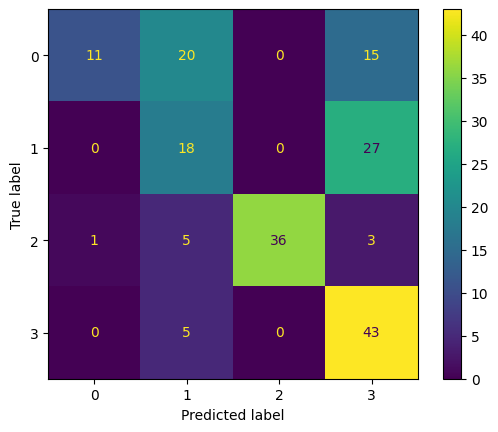

In [37]:
cm = confusion_matrix(y_test, y_test_pred, labels=random_forest_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_grid.classes_)
disp.plot()
plt.show()

## LOGISTIC REGRESSION

In [38]:
pipe_scale_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty=None, random_state = 33, class_weight='balanced'))])

In [39]:
logistic_dist = {
    'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150, 175, 200],
    'classifier__penalty': [None, 'l2'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}


logistic_grid = GridSearchCV(pipe_scale_lr,
                    param_grid = logistic_dist,
                    scoring='balanced_accuracy',
                    cv=3,
                    refit=True,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True,)

np.random.seed(33)

logistic_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           penalty=None,
                                                           random_state=33))]),
             n_jobs=-1,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__penalty': [None, 'l2'],
                         'classifier__solver': ['newton-cg', 'lbfgs', 'sag',
                                                'saga']},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [40]:
resultados = pd.DataFrame(logistic_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__penalty,param_classifier__solver,mean_test_score,std_test_score,mean_train_score,std_train_score
13,10,l2,lbfgs,0.531415,0.121083,0.889998,0.015778
21,25,l2,lbfgs,0.526786,0.128770,0.898166,0.025469
12,10,l2,newton-cg,0.526786,0.116243,0.888825,0.016800
20,25,l2,newton-cg,0.522156,0.124574,0.899291,0.024332
68,175,l2,newton-cg,0.519709,0.142495,0.919296,0.009996


In [41]:
logistic_grid.best_params_

{'classifier__C': 10,
 'classifier__penalty': 'l2',
 'classifier__solver': 'lbfgs'}

In [42]:
logistic_grid.best_score_

0.5314153439153438

In [43]:
print(logistic_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced',
                                    random_state=33))])


In [44]:
modelo_final_logistic = logistic_grid.best_estimator_
print("Intercept:", modelo_final_logistic['classifier'].intercept_)
print("Coeficientes:", list(zip(df.columns, modelo_final_logistic['classifier'].coef_.flatten(), )))
print("Accuracy de test:", modelo_final_logistic.score(x_test, y_test))

Intercept: [-1.22141906  2.03494928 -1.38140697  0.56787675]
Coeficientes: [('CH1', -1.1543365923291018), ('CH2', 0.33385482452189935), ('CH3', 2.6095360508713887), ('CH4', -1.389124554090485), ('CH5', -0.06858429422992542), ('CH6', 0.7763058620437393), ('CH7', 1.6064894568014054), ('CH8', -1.397892729936928), ('AccX', 6.034478494001961), ('AccY', 5.364309825657235), ('AccZ', 3.4077928778124886), ('GyX', -2.4227842938944564), ('GyY', -0.40841411121247406), ('GyZ', 0.687714614834701), ('TimeStamp', 1.5017211542499183), ('label', 1.4584379473022728)]
Accuracy de test: 0.5108695652173914


In [45]:
y_test_pred = modelo_final_logistic.predict(x_test)

In [46]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.50      0.02      0.04        46
           1       0.55      0.24      0.34        45
           2       0.73      0.78      0.75        45
           3       0.41      0.98      0.58        48

    accuracy                           0.51       184
   macro avg       0.55      0.51      0.43       184
weighted avg       0.55      0.51      0.43       184



In [47]:
logistic_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {logistic_accuracy}")

El valor de accuracy: 0.5108695652173914


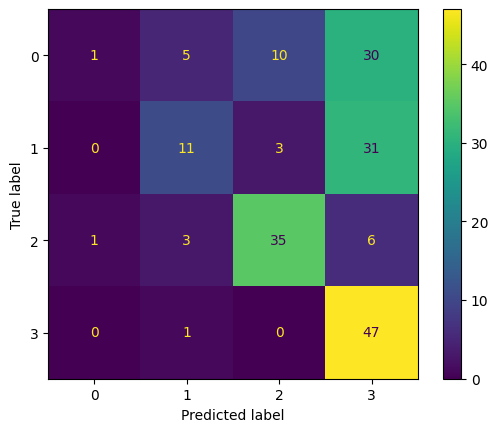

In [48]:
cm = confusion_matrix(y_test, y_test_pred, labels=logistic_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_grid.classes_)
disp.plot()
plt.show()

## BOOSTING


### HistGradientBoost

In [49]:
hist_gradient_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', HistGradientBoostingClassifier(random_state=33, 
                                                                    max_iter=1000,
                                                                    validation_fraction=0.1,
                                                                    n_iter_no_change=5,
                                                                    tol=0.0001))
                    ])

In [50]:
hist_gradient_dist = {'classifier__max_depth' : [None, 1, 3, 5, 7, 10, 25, 50, 75, 100],
              'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9],
              'classifier__l2_regularization' : [0, 1],
              'classifier__max_leaf_nodes': [5, 10, 25, 50, 75, 100]
             }

hist_gradient_grid = GridSearchCV(hist_gradient_pipe,
                           param_grid = hist_gradient_dist,
                           scoring='balanced_accuracy',
                           cv=3,
                           refit=True,
                           n_jobs=-1,
                           verbose=1,
                           return_train_score=True)

np.random.seed(33)

hist_gradient_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 840 candidates, totalling 2520 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        HistGradientBoostingClassifier(max_iter=1000,
                                                                       n_iter_no_change=5,
                                                                       random_state=33,
                                                                       tol=0.0001))]),
             n_jobs=-1,
             param_grid={'classifier__l2_regularization': [0, 1],
                         'classifier__learning_rate': [0.001, 0.01, 0.1, 0.3,
                                                       0.5, 0.7, 0.9],
                         'classifier__max_depth': [None, 1, 3, 5, 7, 10, 25, 50,
                                                   75, 100],
                         'classifier__max_leaf_nodes': [5, 10, 25, 50, 75,
                                                        100]},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [51]:
resultados = pd.DataFrame(hist_gradient_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__l2_regularization,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__max_leaf_nodes,mean_test_score,std_test_score,mean_train_score,std_train_score
246,0,0.5,1,5,0.603373,0.062314,1.0,0.0
247,0,0.5,1,10,0.603373,0.062314,1.0,0.0
251,0,0.5,1,100,0.603373,0.062314,1.0,0.0
250,0,0.5,1,75,0.603373,0.062314,1.0,0.0
249,0,0.5,1,50,0.603373,0.062314,1.0,0.0


In [52]:
hist_gradient_grid.best_params_

{'classifier__l2_regularization': 0,
 'classifier__learning_rate': 0.5,
 'classifier__max_depth': 1,
 'classifier__max_leaf_nodes': 5}

In [53]:
hist_gradient_grid.best_score_

0.6033730158730158

In [54]:
print(hist_gradient_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 HistGradientBoostingClassifier(l2_regularization=0,
                                                learning_rate=0.5, max_depth=1,
                                                max_iter=1000, max_leaf_nodes=5,
                                                n_iter_no_change=5,
                                                random_state=33

In [55]:
modelo_final_hist = hist_gradient_grid.best_estimator_
y_test_pred = modelo_final_hist.predict(x_test)

In [56]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.30      0.33      0.32        45
           2       1.00      0.71      0.83        45
           3       0.33      0.71      0.45        48

    accuracy                           0.44       184
   macro avg       0.41      0.44      0.40       184
weighted avg       0.40      0.44      0.40       184



d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
hist_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {hist_accuracy}")

El valor de accuracy: 0.44021739130434784


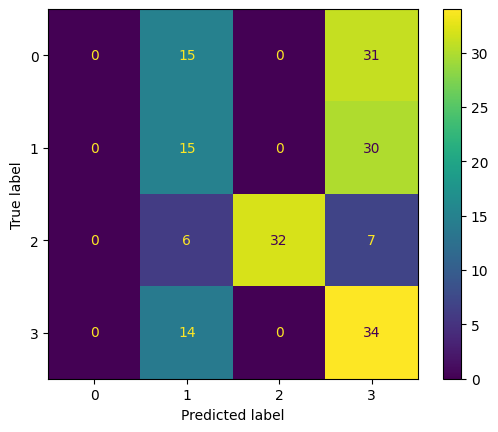

In [58]:
cm = confusion_matrix(y_test, y_test_pred, labels=hist_gradient_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=hist_gradient_grid.classes_)
disp.plot()
plt.show()

### XGBOOST

In [59]:
boost_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier(random_state=33))])

In [60]:
XGBoost_dist = {'classifier__max_depth'      : [3, 5, 7, 9, 11, 13, 15, 25, 50, 75, 100],
              'classifier__subsample'        : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__learning_rate'    : [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__n_estimators'     : sp_randint(10, 500).rvs(5)
              }

XGBoost_grid = GridSearchCV(boost_pipe,
    param_grid= XGBoost_dist,
    scoring    = 'balanced_accuracy',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = 3,
    refit      = True,
    verbose    = 0
)

np.random.seed(33)

XGBoost_grid.fit(X = x_train, y = y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callback...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=33, ...))]),
             n_jobs=19,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7,
                                                       0.9, 1],
                         'classifier__max_depth': [3, 5, 7, 9, 11, 13, 15, 25,
                                                   50, 75, 100],
                         'classifier__n_estimators': array([ 30, 401, 226,  76, 156], dtype=int64),
                         'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1]},
             scoring='balanced_accuracy')

In [61]:
resultados = pd.DataFrame(XGBoost_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__subsample,mean_test_score,std_test_score
996,0.5,3,401,0.1,0.611243,0.008217
1176,0.5,15,401,0.1,0.597421,0.023224
1116,0.5,11,401,0.1,0.597421,0.023224
1206,0.5,25,401,0.1,0.597421,0.023224
1266,0.5,75,401,0.1,0.597421,0.023224


In [62]:
XGBoost_grid.best_params_

{'classifier__learning_rate': 0.5,
 'classifier__max_depth': 3,
 'classifier__n_estimators': 401,
 'classifier__subsample': 0.1}

In [63]:
XGBoost_grid.best_score_

0.6112433862433863

In [64]:
print(XGBoost_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=Non...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,
             

In [65]:
modelo_final_xgb = XGBoost_grid.best_estimator_
y_test_pred = modelo_final_xgb.predict(x_test)

In [66]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.22      0.35        46
           1       0.39      0.27      0.32        45
           2       0.63      0.60      0.61        45
           3       0.35      0.73      0.48        48

    accuracy                           0.46       184
   macro avg       0.57      0.45      0.44       184
weighted avg       0.57      0.46      0.44       184



In [67]:
xgb_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {xgb_accuracy}")

El valor de accuracy: 0.45652173913043476


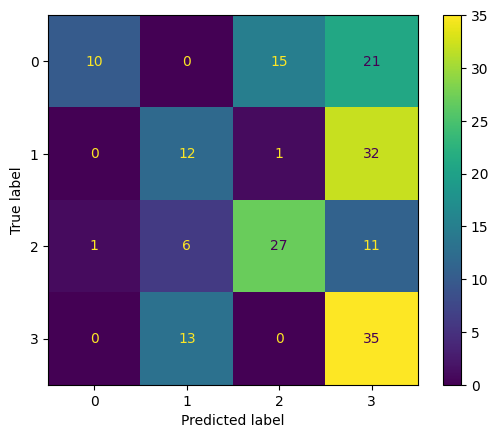

In [68]:
cm = confusion_matrix(y_test, y_test_pred, labels=XGBoost_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGBoost_grid.classes_)
disp.plot()
plt.show()

### LightGBM

In [69]:
light_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier(random_state=33))])

In [70]:
light_dist = {
    'classifier__max_depth': [3, 5, 7, 10, 25, 50, 100],
    'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
    'classifier__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'classifier__n_estimators': sp_randint(10, 500),
    'classifier__num_leaves': [3, 5, 7, 10, 25, 50, 100],
    'classifier__boosting_type': ['gbdt', 'rf'],
    'classifier__force_col_wise': [True],
}

light_grid = RandomizedSearchCV(light_pipe,
        param_distributions= light_dist,
        scoring    = 'balanced_accuracy',
        n_jobs     =  multiprocessing.cpu_count() - 1,
        cv         = 3, 
        refit      = True,
        verbose    = 1,
        return_train_score = True,
        n_iter= 500
       )

np.random.seed(33)
light_grid.fit(X = x_train, y = y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[LightGBM] [Info] Total Bins 2002
[LightGBM] [Info] Number of data points in the train set: 427, number of used features: 14
[LightGBM] [Info] Start training from score -1.393345
[LightGBM] [Info] Start training from score -1.374653
[LightGBM] [Info] Start training from score -1.374653
[LightGBM] [Info] Start training from score -1.402824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
723 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
723 fits failed with the following error:
Traceback (most recent call last):
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, 

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                MinMaxScaler()),
                                                                                               ('scaler2',
                                                                                                RobustScaler())]),
                                                                               Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                             ('classifier',
                                              LGBMClassifier(random_state=33))]),
                   n_iter=500...
                                        'classifier__learning_rate': [0.1, 0.3,
                                                                      0.5, 0.7,
                                                                      0.9],
                                        'classifier__max_depth': [3, 5, 7, 10,
                                                                  25, 50, 100],
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000193346D7410>,
                                        'classifier__num_leaves': [3, 5, 7, 10,
                                                                   25, 50,
                                                                   100],
                                        'classifier__subsample': [0.1, 0.3, 0.5,
                                                                  0.7, 0.9,
                                                                  1]},
                   return_train_score=True, scoring='balanced_accuracy',
                   verbose=1)

In [71]:
resultados = pd.DataFrame(light_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__boosting_type,param_classifier__force_col_wise,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__num_leaves,param_classifier__subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
368,gbdt,True,0.1,100,69,100,0.7,0.586839,0.107187,1.0,0.0
365,gbdt,True,0.3,100,10,7,0.3,0.584524,0.111758,1.0,0.0
23,gbdt,True,0.7,100,442,25,0.9,0.584458,0.115182,1.0,0.0
439,gbdt,True,0.7,25,178,25,0.3,0.584458,0.115182,1.0,0.0
393,gbdt,True,0.7,25,178,100,0.3,0.584458,0.115182,1.0,0.0


In [72]:
light_grid.best_params_

{'classifier__boosting_type': 'gbdt',
 'classifier__force_col_wise': True,
 'classifier__learning_rate': 0.1,
 'classifier__max_depth': 100,
 'classifier__n_estimators': 69,
 'classifier__num_leaves': 100,
 'classifier__subsample': 0.7}

In [73]:
light_grid.best_score_

0.5868386243386243

In [74]:
print(light_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(force_col_wise=True, max_depth=100,
                                n_estimators=69, num_leaves=100,
                                random_state=33, subsample=0.7))])


In [75]:
modelo_final_light = light_grid.best_estimator_
y_test_pred = modelo_final_light.predict(x_test)

In [76]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.22      0.35        46
           1       0.20      0.18      0.19        45
           2       1.00      0.80      0.89        45
           3       0.36      0.73      0.48        48

    accuracy                           0.48       184
   macro avg       0.62      0.48      0.48       184
weighted avg       0.61      0.48      0.48       184



In [77]:
light_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {light_accuracy}")

El valor de accuracy: 0.483695652173913


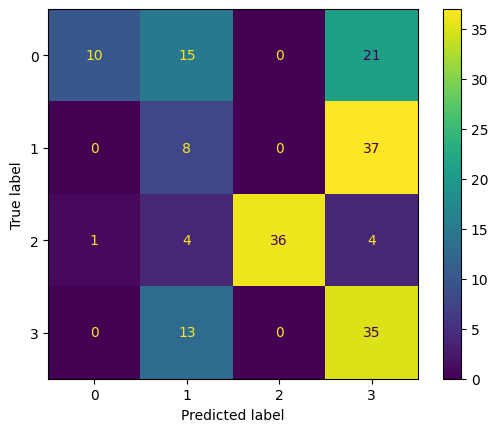

In [78]:
cm = confusion_matrix(y_test, y_test_pred, labels=light_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=light_grid.classes_)
disp.plot()
plt.show()

## SVM

In [79]:
svm_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

In [80]:
svm_param_dist = {
    'classifier__C': [ 1, 10, 25, 50, 75, 100, 125, 150, 175, 200],  
    'classifier__kernel': ['linear', 'rbf'], 
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 5, 10]
}

svm_grid = GridSearchCV(
    svm_pipe,
    param_grid=svm_param_dist,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

svm_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier', SVC())]),
             n_jobs=19,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__gamma': ['scale', 'auto', 0.001, 0.01,
                                               0.1, 1, 5, 10],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='balanced_accuracy')

In [81]:
resultados = pd.DataFrame(svm_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__gamma,param_classifier__kernel,mean_test_score,std_test_score
21,10,0.001,rbf,0.581349,0.145820
37,25,0.001,rbf,0.571759,0.136979
136,175,0.1,linear,0.571561,0.181995
138,175,1,linear,0.571561,0.181995
140,175,5,linear,0.571561,0.181995


In [82]:
svm_grid.best_params_

{'classifier__C': 10, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}

In [83]:
svm_grid.best_score_

0.5813492063492064

In [84]:
print(svm_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier', SVC(C=10, gamma=0.001))])


In [85]:
modelo_final_svm = svm_grid.best_estimator_

In [86]:
y_test_pred = modelo_final_svm.predict(x_test)

In [87]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.85      0.73        46
           1       0.71      0.53      0.61        45
           2       1.00      0.82      0.90        45
           3       0.90      0.98      0.94        48

    accuracy                           0.80       184
   macro avg       0.81      0.80      0.79       184
weighted avg       0.81      0.80      0.80       184



In [88]:
svm_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {svm_accuracy}")

El valor de accuracy: 0.7989130434782609


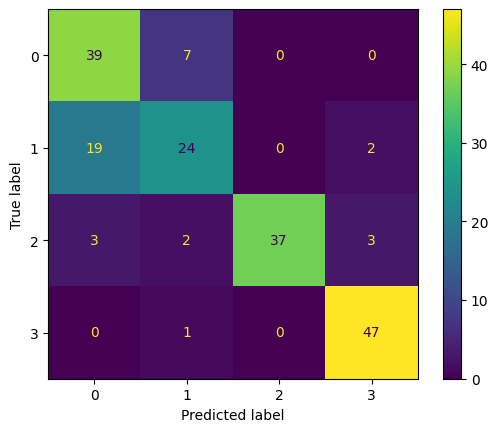

In [89]:
cm = confusion_matrix(y_test, y_test_pred, labels=svm_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_grid.classes_)
disp.plot()
plt.show()

## SGD


In [90]:
sgd_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SGDClassifier())])

In [91]:
sgd_params = {
    'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 0.00001],   
    'classifier__penalty': ['l1', 'l2', 'elasticnet', None],        
    'classifier__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'], 
    'classifier__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
      'classifier__eta0': [0.001, 0.01, 0.1]  
}

sgd_grid = GridSearchCV(sgd_pipe,
    param_grid=sgd_params,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

sgd_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier', SGDClassifier())]),
             n_jobs=19,
             param_grid={'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'classifier__eta0': [0.001, 0.01, 0.1],
                         'classifier__learning_rate': ['constant', 'optimal',
                                                       'invscaling',
                                                       'adaptive'],
                         'classifier__loss': ['hinge', 'log_loss',
                                              'modified_huber', 'squared_hinge',
                                              'perceptron'],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 None]},
             scoring='balanced_accuracy')

In [92]:
resultados = pd.DataFrame(sgd_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__alpha,param_classifier__eta0,param_classifier__learning_rate,param_classifier__loss,param_classifier__penalty,mean_test_score,std_test_score
185,0.1,0.1,optimal,log_loss,l2,0.600265,0.181139
96,0.1,0.01,constant,perceptron,l1,0.594974,0.089275
158,0.1,0.01,adaptive,perceptron,elasticnet,0.592460,0.066788
225,0.1,0.1,adaptive,log_loss,l2,0.588360,0.165778
105,0.1,0.01,optimal,log_loss,l2,0.585913,0.165955


In [93]:
sgd_grid.best_params_

{'classifier__alpha': 0.1,
 'classifier__eta0': 0.1,
 'classifier__learning_rate': 'optimal',
 'classifier__loss': 'log_loss',
 'classifier__penalty': 'l2'}

In [94]:
sgd_grid.best_score_

0.6002645502645503

In [95]:
print(sgd_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 SGDClassifier(alpha=0.1, eta0=0.1, loss='log_loss'))])


In [96]:
modelo_final_sgd = sgd_grid.best_estimator_
y_test_pred = modelo_final_sgd.predict(x_test)

In [97]:
print(classification_report(y_test, y_test_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67        46
           1       0.56      0.51      0.53        45
           2       0.97      0.82      0.89        45
           3       0.76      0.98      0.85        48

    accuracy                           0.74       184
   macro avg       0.75      0.74      0.74       184
weighted avg       0.75      0.74      0.74       184



In [98]:
sgd_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {sgd_accuracy}")

El valor de accuracy: 0.7445652173913043


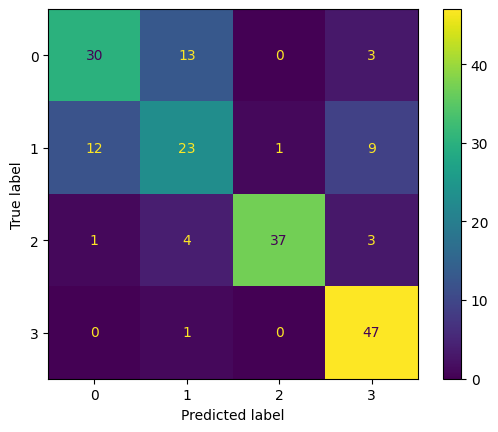

In [99]:
cm = confusion_matrix(y_test, y_test_pred, labels=sgd_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_grid.classes_)
disp.plot()
plt.show()

## ELECCION DEL MEJOR MODELO

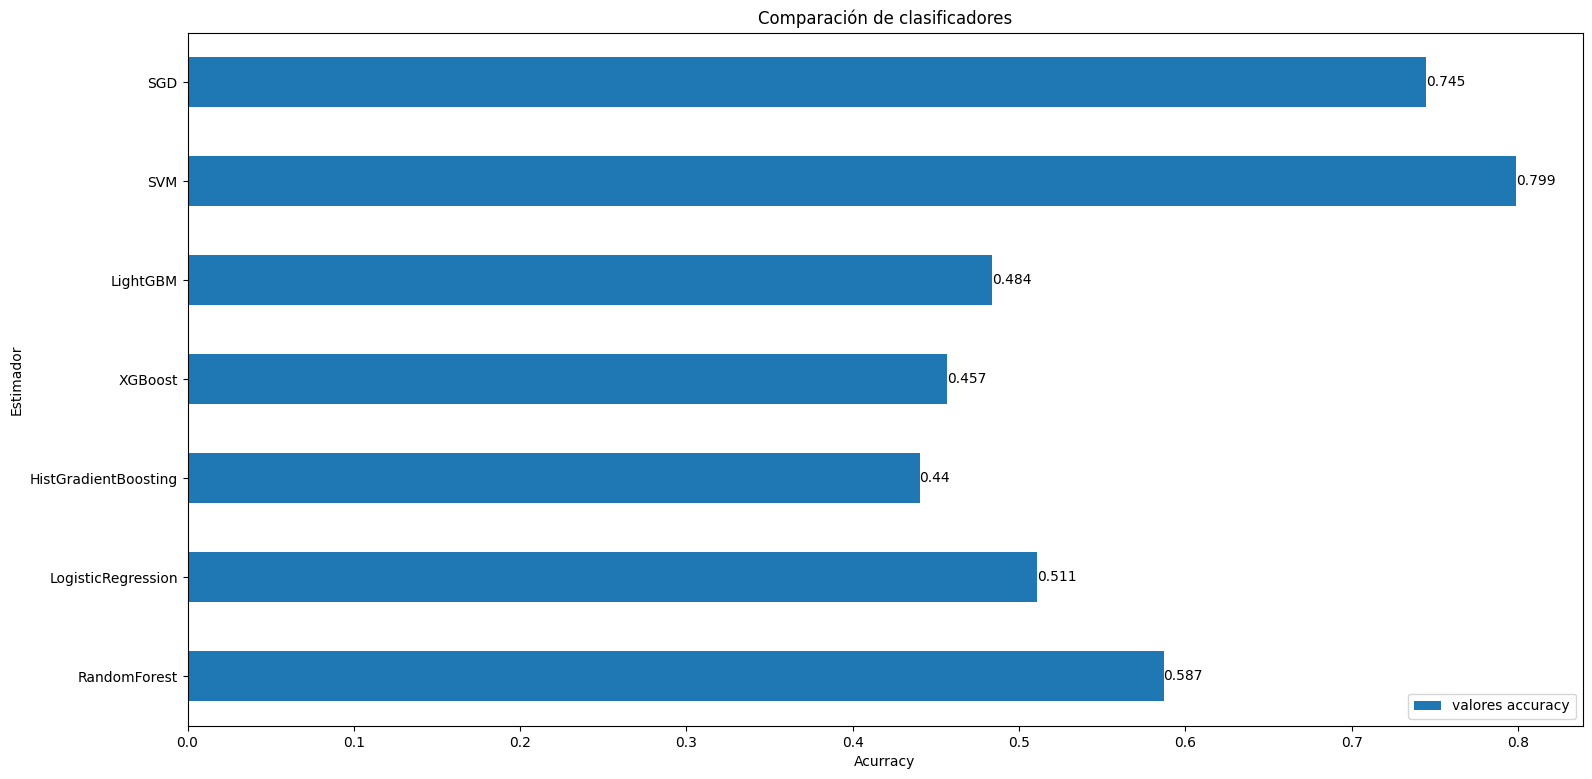

In [100]:
df_comparacion = pd.DataFrame({
                    'estimador': ['RandomForest', 'LogisticRegression', 'HistGradientBoosting', 'XGBoost', 'LightGBM', 'SVM', 'SGD'],
                    'valores accuracy': [forest_accuracy, logistic_accuracy, hist_accuracy, xgb_accuracy, light_accuracy, svm_accuracy, sgd_accuracy]
                 })

fig, ax = plt.subplots(figsize=(18, 9))
df_comparacion.set_index('estimador').plot(kind='barh', ax=ax)
ax.set_xlabel('Acurracy')
ax.set_ylabel('Estimador')
ax.set_title('Comparación de clasificadores');

for i, v in enumerate(df_comparacion['valores accuracy']):
    ax.annotate(str(round(v, 3)), xy=(v, i), va='center', ha='left', fontsize=10)

Ahora diseñamos todos los mejores modelos para probar su capacidad de generalización, con otros datos en el archivo `generalizacion.ipynb`.

In [102]:
preprocessor = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [101]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(
        alpha = 0.1,
        eta0 = 0.1,
        learning_rate = 'optimal',
        loss = 'log_loss',
        penalty = 'l2'   
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/4 GESTOS PUÑO/modelo_sgd.pkl', 'wb'))

In [108]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        bootstrap = True,
        n_estimators = 400
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/4 GESTOS PUÑO/modelo_RF.pkl', 'wb'))

In [103]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        C = 10,
        gamma = 0.001,
        kernel = 'rbf'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/4 GESTOS PUÑO/modelo_SVM.pkl', 'wb'))

In [107]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        C = 10,
        penalty = 'l2',
        solver = 'lbfgs',
        class_weight='balanced'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/4 GESTOS PUÑO/modelo_LR.pkl', 'wb'))

d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [106]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier(
        validation_fraction = 0.1,
        n_iter_no_change = 5,
        tol = 0.0001,
        l2_regularization = 0,
        learning_rate = 0.5,
        max_depth = 1,
        max_leaf_nodes = 5         
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/4 GESTOS PUÑO/modelo_HIST.pkl', 'wb'))

In [105]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        learning_rate = 0.5,
        max_depth = 3,
        n_estimators = 401,
        subsample = 0.1        
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/4 GESTOS PUÑO/modelo_XGB.pkl', 'wb'))

In [104]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(
        boosting_type = 'gbdt',
        force_col_wise = True,
        learning_rate = 0.1,
        max_depth = 100,
        n_estimators = 69,
        num_leaves = 100,
        subsample = 0.7      
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2/4 GESTOS PUÑO/modelo_LGBMC.pkl', 'wb'))

[LightGBM] [Info] Total Bins 2002
[LightGBM] [Info] Number of data points in the train set: 427, number of used features: 14
[LightGBM] [Info] Start training from score -1.393345
[LightGBM] [Info] Start training from score -1.374653
[LightGBM] [Info] Start training from score -1.374653
[LightGBM] [Info] Start training from score -1.402824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 